In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from scipy import stats

## Step 1: Data Exploration

### 1: Read and explore the dataset

In [168]:
df = pd.read_csv('../data/DM2425_ABCDEats_DATASET.csv')

# Strip trailing spaces from column names
df.columns = df.columns.str.strip()
df.columns


/var/folders/dq/lm4hsw5542x634hwm_gj_4bm0000gn/T/ipykernel_92206/1488339330.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/DM2425_ABCDEats_DATASET.csv')


Index(['customer_id', 'customer_region', 'customer_age', 'vendor_count',
       'product_count', 'is_chain', 'first_order', 'last_order', 'last_promo',
       'payment_method', 'CUI_American', 'CUI_Asian', 'CUI_Beverages',
       'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts',
       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks',
       'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5',
       'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7',
       'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15',
       'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23'],
      dtype='object')

In [169]:
df.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18,2,5,1,0,1,DELIVERY,DIGI,...,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17,2,2,2,0,1,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38,1,2,2,0,1,DISCOUNT,CASH,...,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,,2,3,1,0,2,DELIVERY,DIGI,...,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20,2,5,0,0,2,-,DIGI,...,0,0,0,0,0,0,0,0,0,0


In [170]:
df.tail()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
31883,f4e366c281,8670,30,1,1,1,,0,FREEBIE,DIGI,...,0,0,0,0,0,0,0,0,0,0
31884,f6b6709018,8670,,1,1,0,,0,DELIVERY,DIGI,...,0,0,1,0,0,0,0,0,0,0
31885,f74ad8ce3f,8670,24,1,1,1,,0,-,DIGI,...,0,0,0,0,0,0,0,0,0,0
31886,f7b19c0241,8670,34,1,1,0,,0,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
31887,fd40d3b0e0,4660,30,1,1,0,,0,-,CASH,...,0,0,1,0,0,0,0,0,0,0


find out data types for missmatch

In [171]:
print(df.dtypes) 

customer_id                  object
customer_region              object
customer_age                 object
vendor_count                  int64
product_count                 int64
is_chain                      int64
first_order                  object
last_order                    int64
last_promo                   object
payment_method               object
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
DOW_0                         int64
DOW_1                         int64
DOW_2                       

found some missmatches here which dosent make sense in the datatype format

In [172]:
# Convert 'customer_age', 'first_order', and 'HR_0' to numeric, coercing errors to NaN
df['customer_age'] = pd.to_numeric(df['customer_age'], errors='coerce').astype('Int64')
df['first_order'] = pd.to_numeric(df['first_order'], errors='coerce').astype('Int64')
df['HR_0'] = pd.to_numeric(df['HR_0'], errors='coerce').astype('Int64')

# Verify the changes
print(df[['customer_age', 'first_order', 'HR_0']].dtypes)


customer_age    Int64
first_order     Int64
HR_0            Int64
dtype: object


In [173]:
# Count missing values in each column

df.replace("", np.nan, inplace=True)

missing_values = df.isnull().sum()
print(missing_values)


customer_id                    0
customer_region                0
customer_age                 727
vendor_count                   0
product_count                  0
is_chain                       0
first_order                  106
last_order                     0
last_promo                     0
payment_method                 0
CUI_American                   0
CUI_Asian                      0
CUI_Beverages                  0
CUI_Cafe                       0
CUI_Chicken Dishes             0
CUI_Chinese                    0
CUI_Desserts                   0
CUI_Healthy                    0
CUI_Indian                     0
CUI_Italian                    0
CUI_Japanese                   0
CUI_Noodle Dishes              0
CUI_OTHER                      0
CUI_Street Food / Snacks       0
CUI_Thai                       0
DOW_0                          0
DOW_1                          0
DOW_2                          0
DOW_3                          0
DOW_4                          0
DOW_5     

In [174]:
numeric_summary = df.describe()
print(numeric_summary)


       customer_age  vendor_count  product_count      is_chain  first_order  \
count       31161.0  31888.000000   31888.000000  31888.000000      31782.0   
mean      27.506499      3.102609       5.668245      2.818866    28.478604   
std        7.160898      2.771587       6.957287      3.977529    24.109086   
min            15.0      0.000000       0.000000      0.000000          0.0   
25%            23.0      1.000000       2.000000      1.000000          7.0   
50%            26.0      2.000000       3.000000      2.000000         22.0   
75%            31.0      4.000000       7.000000      3.000000         45.0   
max            80.0     41.000000     269.000000     83.000000         90.0   

         last_order  CUI_American     CUI_Asian  CUI_Beverages      CUI_Cafe  \
count  31888.000000  31888.000000  31888.000000   31888.000000  31888.000000   
mean      63.675521      4.880438      9.960451       2.300633      0.801163   
std       23.226123     11.654018     23.564351 

In [175]:
def analyze_missing_data(df):
    return pd.DataFrame({
        'variable': df.columns,
        'dtype': df.dtypes,
        'count': len(df),
        'unique': df.nunique(),
        'missing': df.isna().sum(),
        'pc_missing': (df.isna().sum() / len(df) * 100).round()
    }).reset_index(drop=True)

# Usage:
data_summary = analyze_missing_data(df)
data_summary

,variable,dtype,count,unique,missing,pc_missing
0,customer_id,object,31888,31875,0,0.0
1,customer_region,object,31888,9,0,0.0
2,customer_age,Int64,31888,66,727,2.0
3,vendor_count,int64,31888,37,0,0.0
4,product_count,int64,31888,93,0,0.0
5,is_chain,int64,31888,60,0,0.0
6,first_order,Int64,31888,91,106,0.0
7,last_order,int64,31888,91,0,0.0
8,last_promo,object,31888,4,0,0.0
9,payment_method,object,31888,3,0,0.0


In [176]:
#split data into metric and non_metric features
non_metric_features = [ "customer_region", "last_promo", "payment_method"]
metric_features = df.columns.drop(non_metric_features).tolist()

print(metric_features)

['customer_id', 'customer_age', 'vendor_count', 'product_count', 'is_chain', 'first_order', 'last_order', 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23']


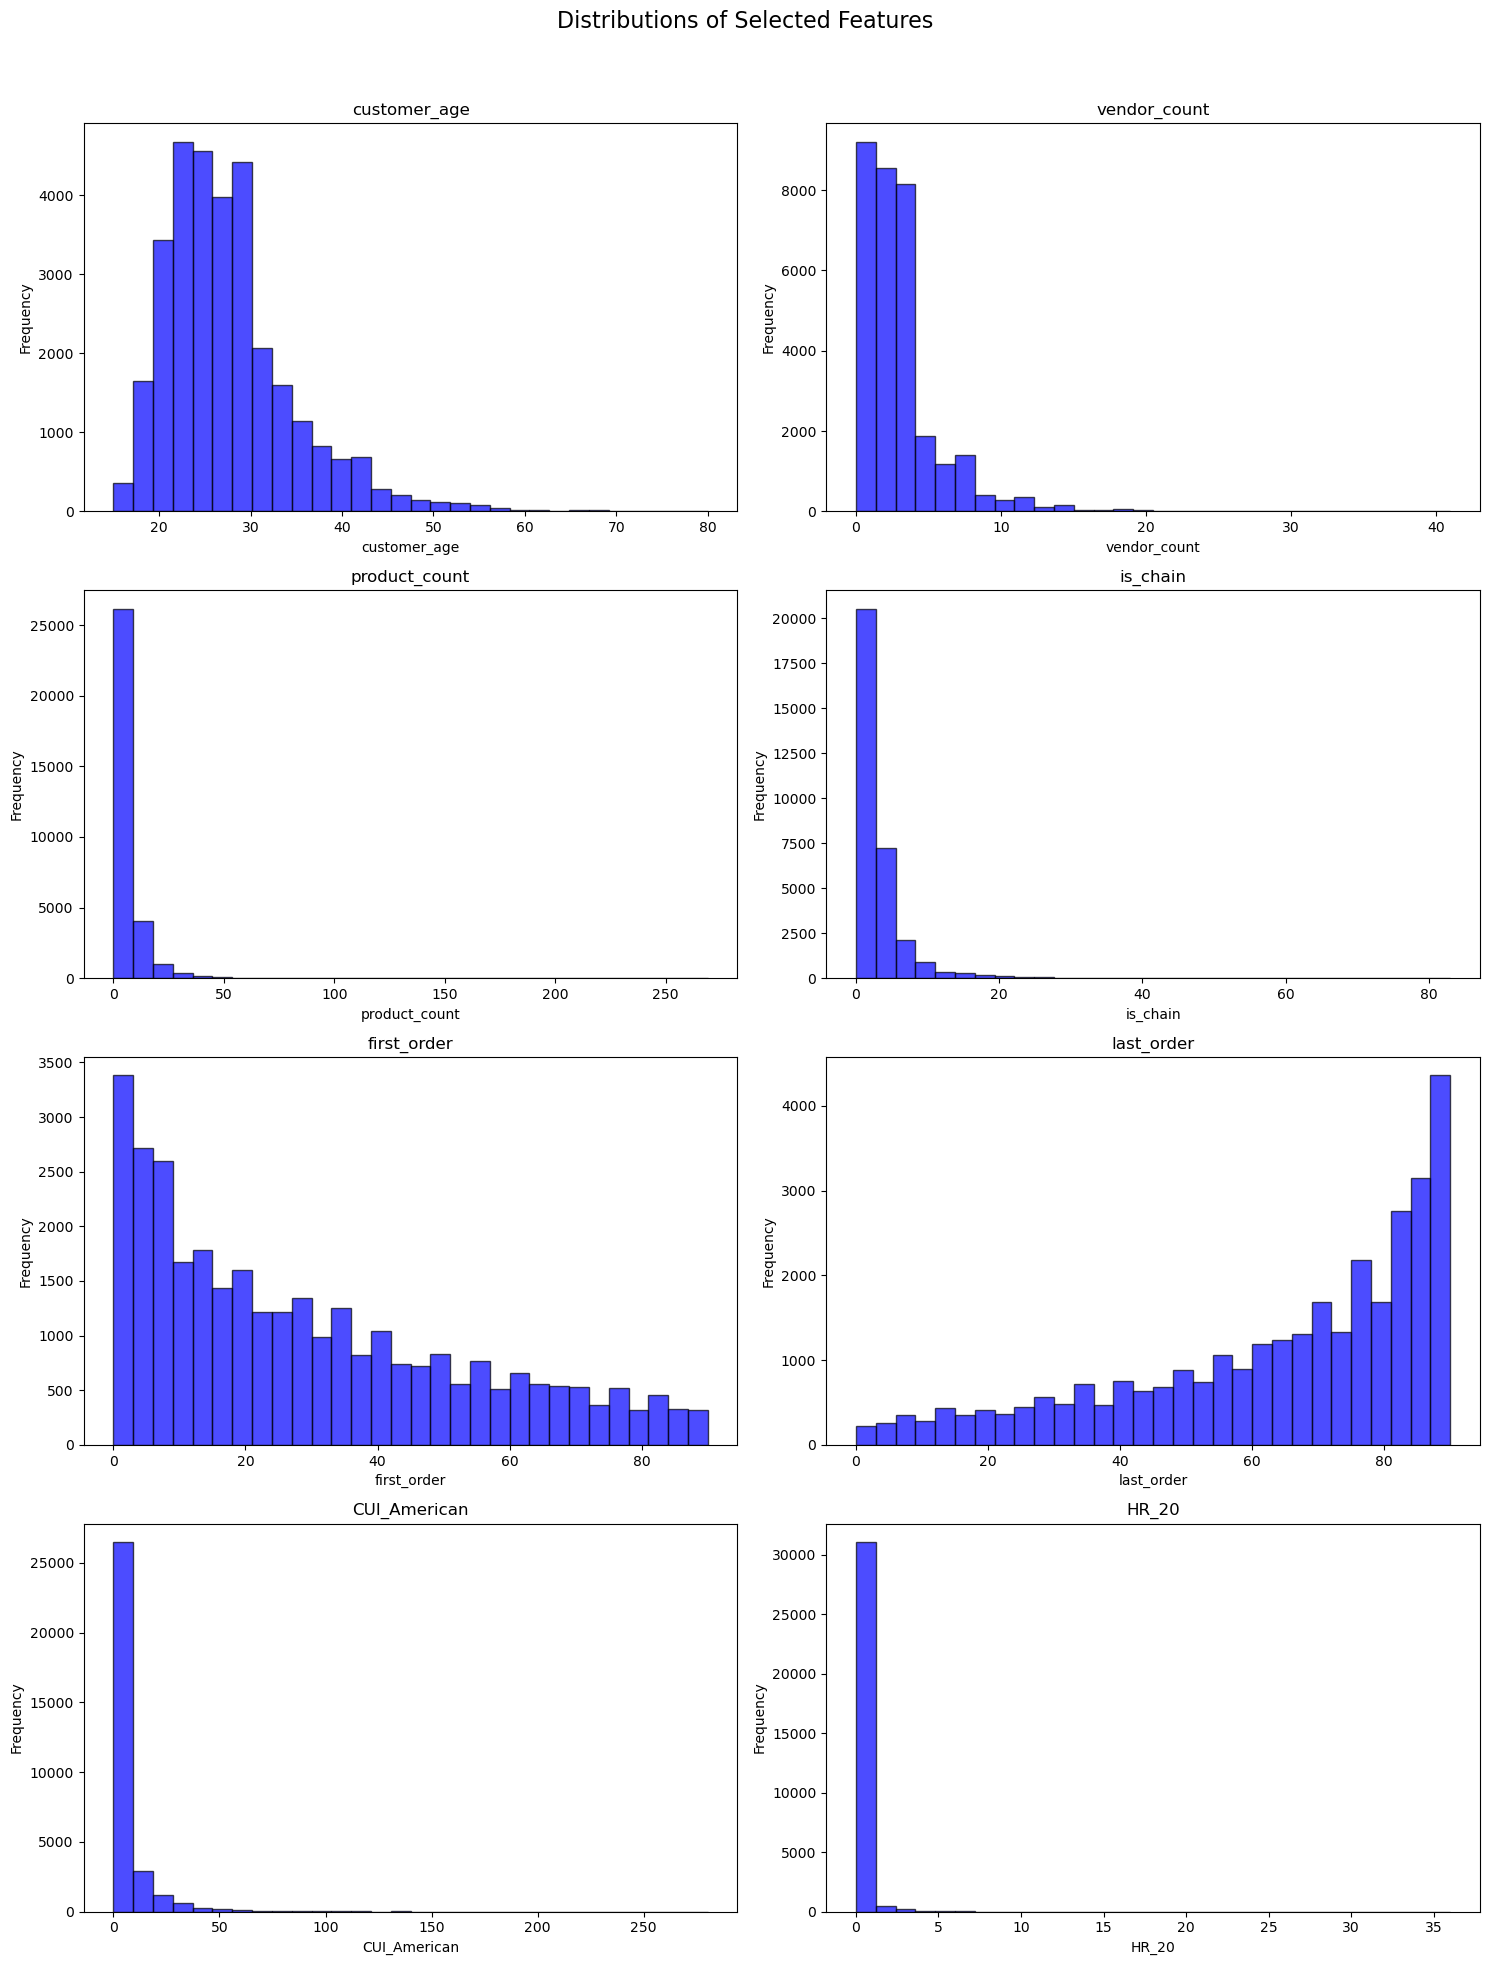

In [177]:
# Assuming the dataframe df is already loaded with the appropriate data
    
# Plotting histograms and boxplots for initial columns to check distributions
columns_to_plot = [
    'customer_age', 'vendor_count', 'product_count', 
    'is_chain', 'first_order', 'last_order', 'CUI_American', 'HR_20'
]

# Create a figure with subplots
fig, axs = plt.subplots(4, 2, figsize=(15, 20))
fig.suptitle('Distributions of Selected Features', fontsize=16)

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Generate histograms and boxplots for each column
for i, col in enumerate(columns_to_plot):
    # Histogram
    axs[i].hist(df[col].dropna(), bins=30, color='blue', alpha=0.7, edgecolor='black')
    axs[i].set_title(f'{col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### BEFORE HR_0 FIX


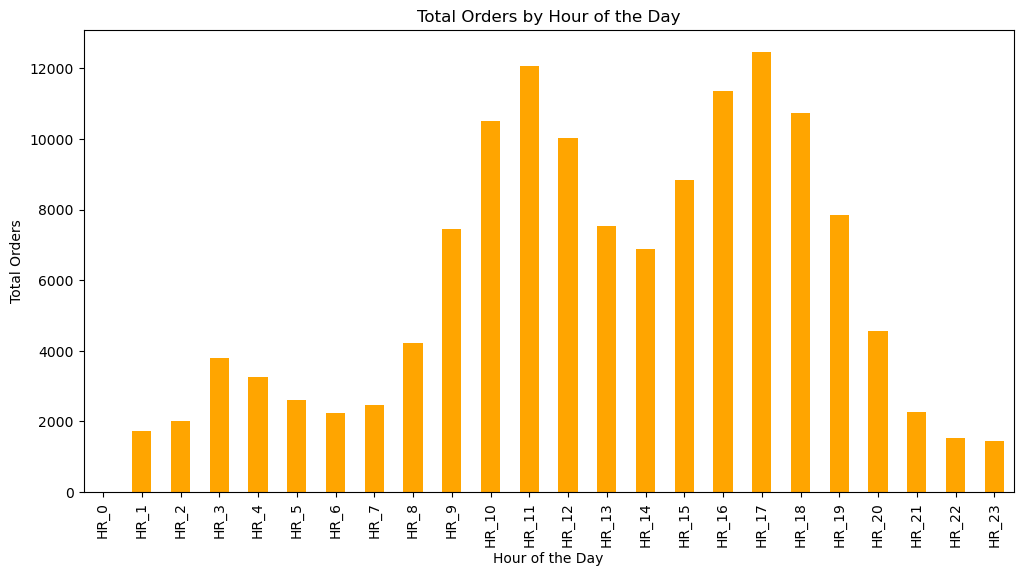

In [178]:
# Summing up orders for each hour column
hour_columns = [f'HR_{i}' for i in range(24)]
hourly_order_counts = df[hour_columns].sum()

# Plotting hourly order counts
plt.figure(figsize=(12, 6))
hourly_order_counts.plot(kind='bar', color='orange')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Orders')
plt.title('Total Orders by Hour of the Day')
plt.show()


 ### AFTER HR_0 FIX

In [179]:
def fix_hr0(df):
    """
    Fix HR_0 values by comparing total DOW orders with sum of HR orders.
    If there's a mismatch, assign missing orders to HR_0.
    """
    # Calculate total orders from DOW columns
    dow_cols = ['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']
    total_dow_orders = df[dow_cols].sum(axis=1)
    
    # Calculate total orders from HR columns (excluding HR_0)
    hr_cols = [f'HR_{i}' for i in range(1, 24)]  # HR_1 to HR_23
    total_hr_orders = df[hr_cols].sum(axis=1)
    
    # Calculate missing orders
    missing_orders = total_dow_orders - total_hr_orders
    
    # Update HR_0 with missing orders where the difference is positive
    df['HR_0'] = np.where(missing_orders > 0, missing_orders, 0)
    
    # Print summary of changes
    total_fixed = (missing_orders > 0).sum()
    total_orders_added = missing_orders[missing_orders > 0].sum()
    
    print(f"Fixed {total_fixed} rows")
    print(f"Added {total_orders_added} orders to HR_0")
    print("\nVerification:")
    print(f"Total DOW orders: {total_dow_orders.sum()}")
    print(f"Total HR orders after fix: {df[['HR_' + str(i) for i in range(24)]].sum().sum()}")
    
    return df

# Apply the fix
df = fix_hr0(df)

Fixed 1165 rows
Added 1553 orders to HR_0

Verification:
Total DOW orders: 139313
Total HR orders after fix: 139313


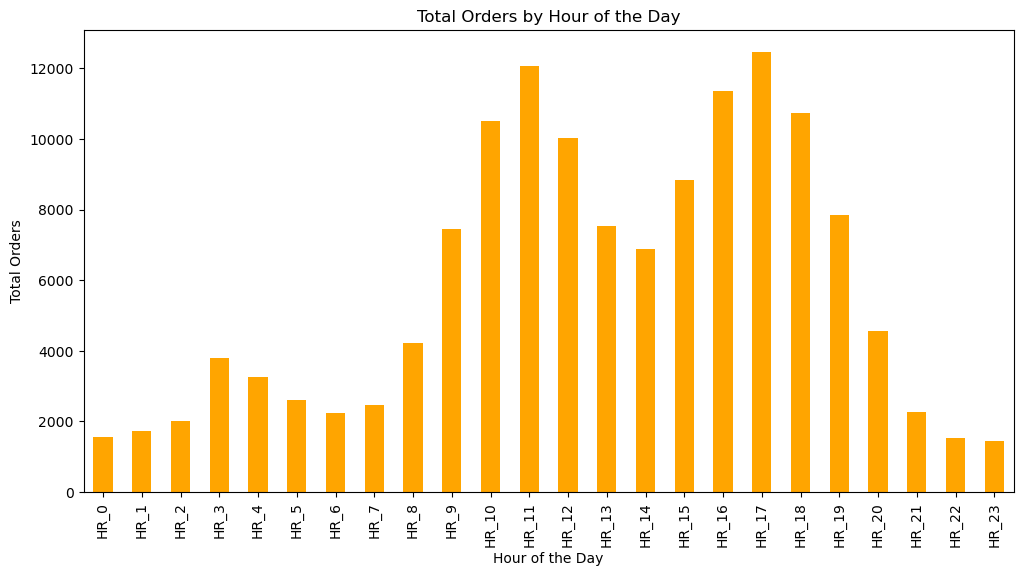

In [180]:
# Summing up orders for each hour column
hour_columns = [f'HR_{i}' for i in range(24)]
hourly_order_counts = df[hour_columns].sum()

# Plotting hourly order counts
plt.figure(figsize=(12, 6))
hourly_order_counts.plot(kind='bar', color='orange')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Orders')
plt.title('Total Orders by Hour of the Day')
plt.show()


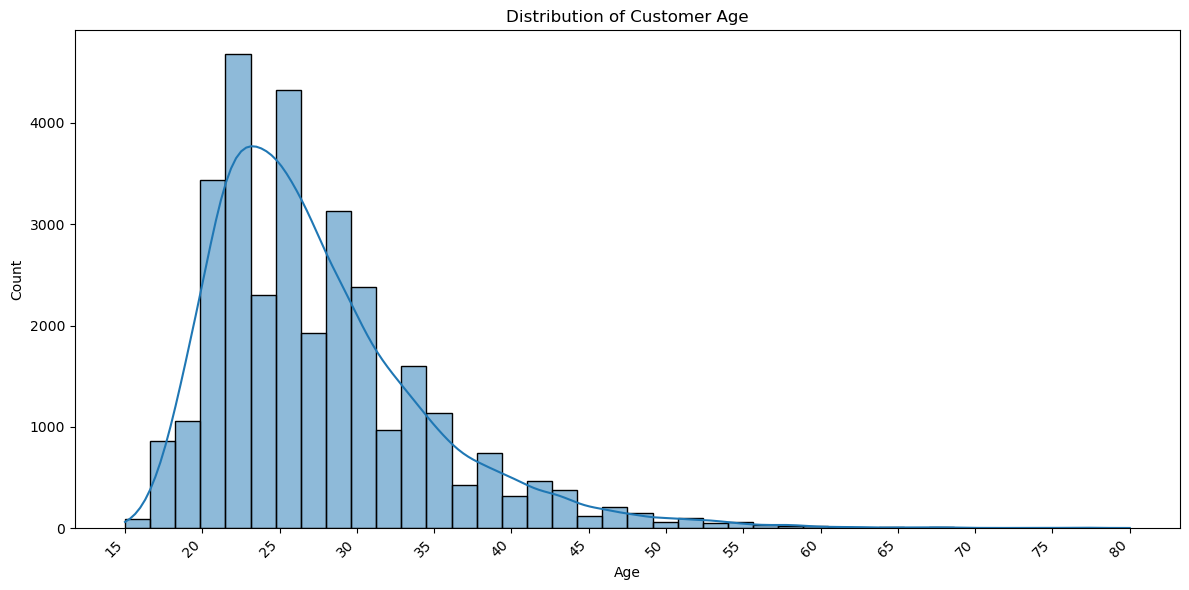

Minimum age: 15
Maximum age: 80
Mean age: 27.51
Median age: 26.0
Number of valid age entries: 31161
Number of missing or invalid age entries: 727


In [181]:
# Convert 'customer_age' to numeric, coercing errors to NaN
df['customer_age'] = pd.to_numeric(df['customer_age'], errors='coerce')

# Remove NaN values and sort
age_data = df['customer_age'].dropna().sort_values()

# Create the plot
plt.figure(figsize=(12, 6))
sns.histplot(age_data, bins=40, kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Count')

# Improve x-axis readability
min_age = int(age_data.min())
max_age = int(age_data.max())
plt.xticks(range(min_age, max_age+1, 5))
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Print some statistics
print(f"Minimum age: {min_age}")
print(f"Maximum age: {max_age}")
print(f"Mean age: {age_data.mean():.2f}")
print(f"Median age: {age_data.median()}")
print(f"Number of valid age entries: {len(age_data)}")
print(f"Number of missing or invalid age entries: {len(df) - len(age_data)}")

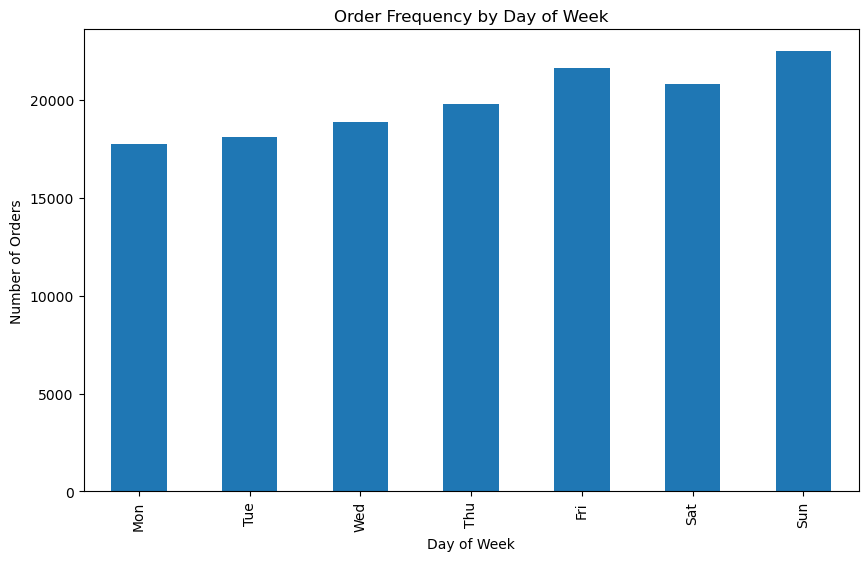

In [182]:
dow_order = df[['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']].sum()
plt.figure(figsize=(10, 6))
dow_order.plot(kind='bar')
plt.title('Order Frequency by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

In [183]:
# 1. Data Overview and Preprocessing
print(df.info())
print(df.isnull().sum())

# Convert 'customer_age' to numeric, coercing errors to NaN
df['customer_age'] = pd.to_numeric(df['customer_age'], errors='coerce')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  Int64  
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  Int64  
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

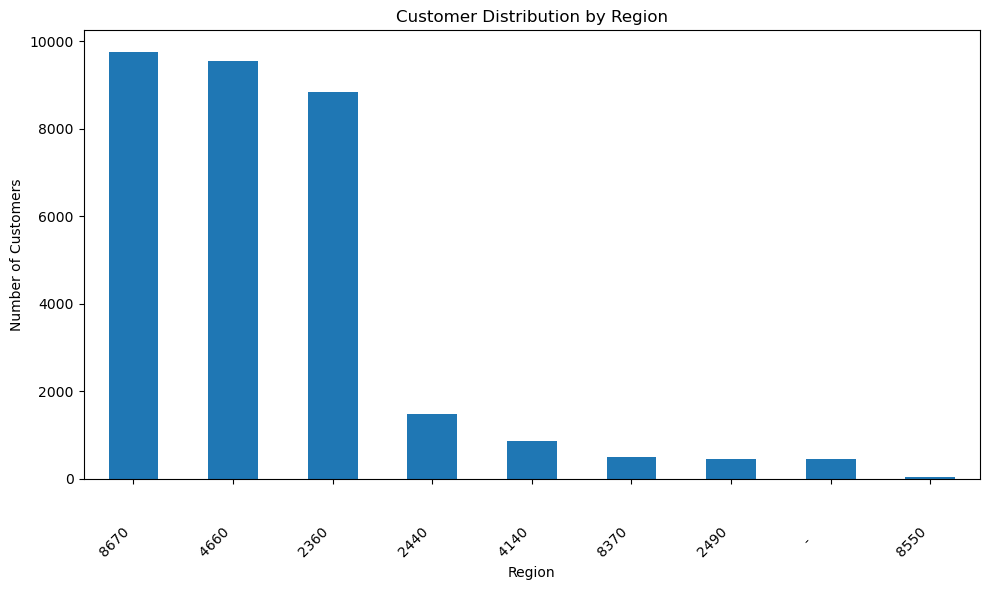

In [184]:
# Age distribution (we've already done this)# Region distribution
region_counts = df['customer_region'].value_counts()
plt.figure(figsize=(10, 6))
region_counts.plot(kind='bar')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


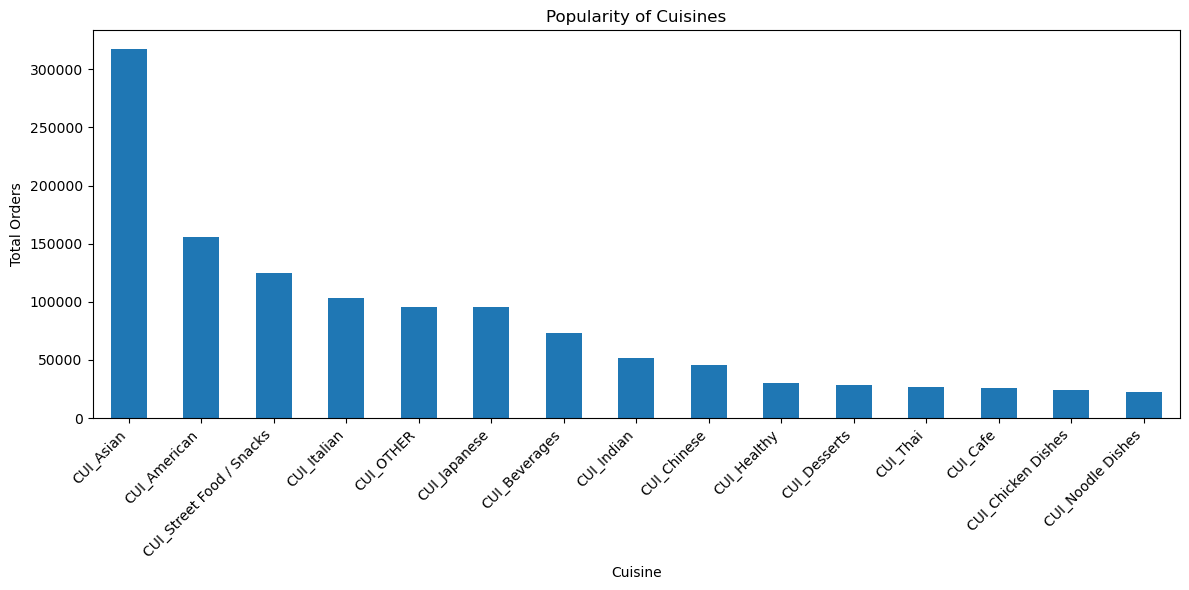

In [185]:
# 4. Cuisine Preferences
cuisine_cols = [col for col in df.columns if col.startswith('CUI_')]
cuisine_popularity = df[cuisine_cols].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
cuisine_popularity.plot(kind='bar')
plt.title('Popularity of Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Total Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

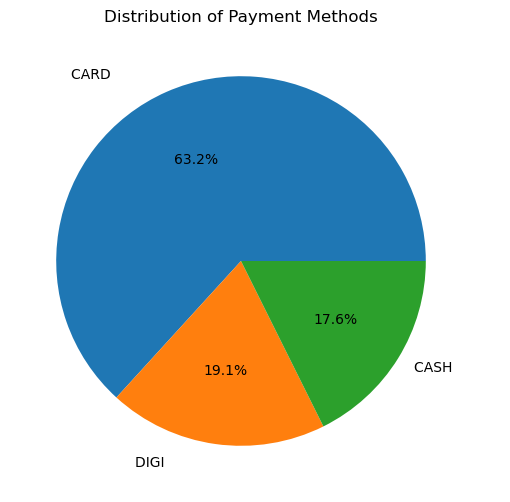

In [186]:
# 5. Payment and Promotion Analysis
payment_method_counts = df['payment_method'].value_counts()
plt.figure(figsize=(8, 6))
payment_method_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Payment Methods')
plt.ylabel('')
plt.show()

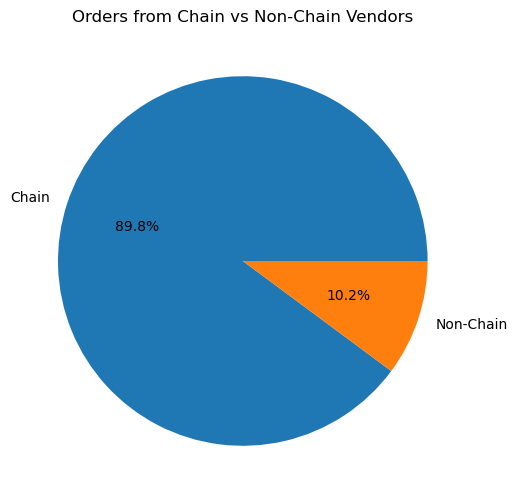

In [187]:
#chain vs no chain
chain_orders = df[df['is_chain'] > 0]['product_count'].sum()
non_chain_orders = df[df['is_chain'] == 0]['product_count'].sum()

plt.figure(figsize=(8, 6))
plt.pie([chain_orders, non_chain_orders], labels=['Chain', 'Non-Chain'], autopct='%1.1f%%')
plt.title('Orders from Chain vs Non-Chain Vendors')
plt.show()


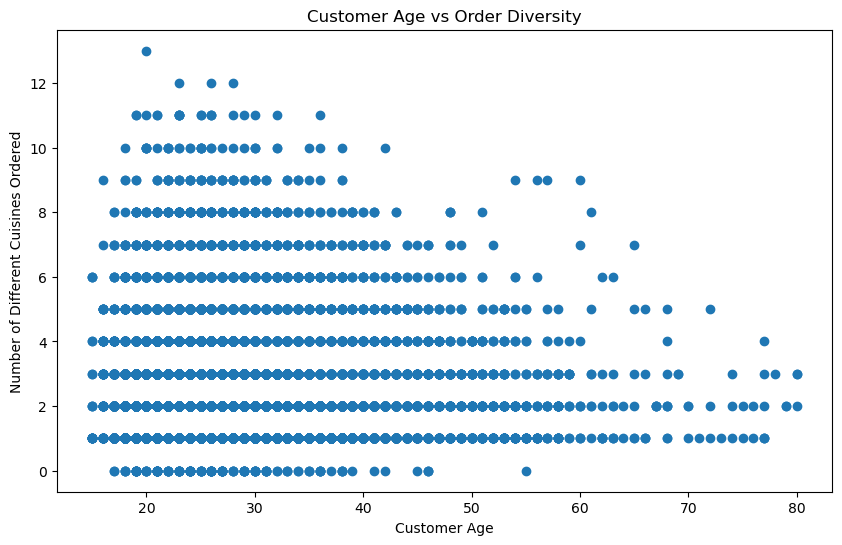

Correlation between age and order diversity: -0.00040440711485676057


In [188]:
#Relationship between customer age and order diversity:
df['order_diversity'] = df[cuisine_cols].astype(bool).sum(axis=1)
plt.figure(figsize=(10, 6))
plt.scatter(df['customer_age'], df['order_diversity'])
plt.title('Customer Age vs Order Diversity')
plt.xlabel('Customer Age')
plt.ylabel('Number of Different Cuisines Ordered')
plt.show()

print("Correlation between age and order diversity:", 
      df['customer_age'].corr(df['order_diversity']))

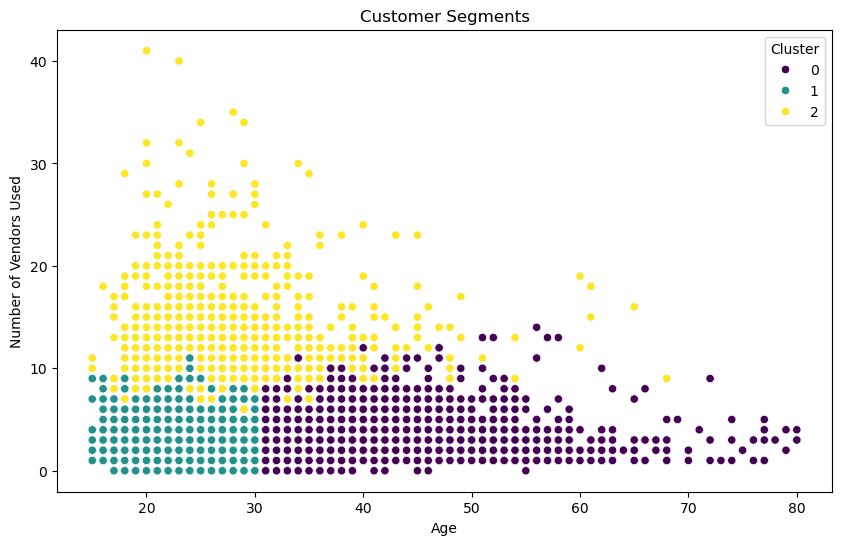

In [189]:
# 6. Customer Segmentation
# Select features for clustering
features = ['customer_age', 'vendor_count', 'product_count']
X = df[features].dropna()

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
X['Cluster'] = kmeans.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X, x='customer_age', y='vendor_count', hue='Cluster', palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Age')
plt.ylabel('Number of Vendors Used')
plt.show()



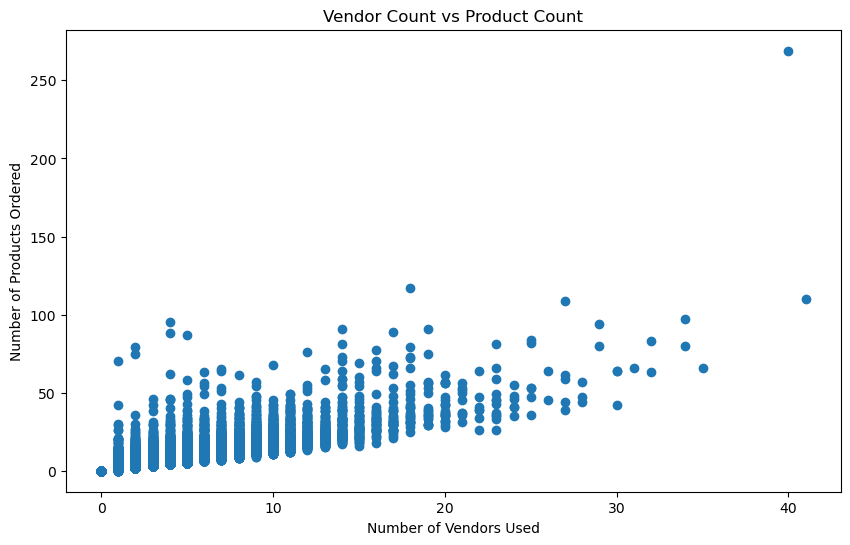

Correlation between vendor count and product count: 0.8276364706442381


In [190]:

#regional cusine preferences
plt.figure(figsize=(10, 6))
plt.scatter(df['vendor_count'], df['product_count'])
plt.title('Vendor Count vs Product Count')
plt.xlabel('Number of Vendors Used')
plt.ylabel('Number of Products Ordered')
plt.show()

print("Correlation between vendor count and product count:", 
      df['vendor_count'].corr(df['product_count']))

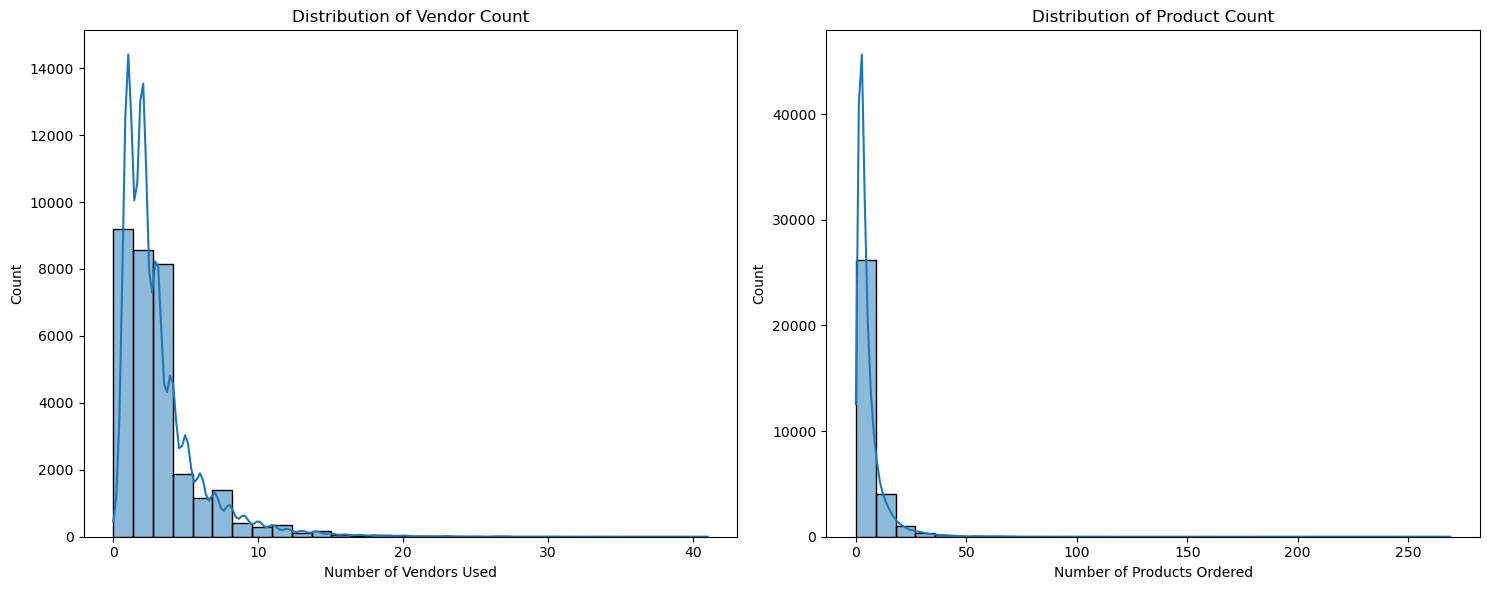

In [191]:
# Additional analysis: Distribution of vendor and product counts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(df['vendor_count'], bins=30, kde=True, ax=ax1)
ax1.set_title('Distribution of Vendor Count')
ax1.set_xlabel('Number of Vendors Used')

sns.histplot(df['product_count'], bins=30, kde=True, ax=ax2)
ax2.set_title('Distribution of Product Count')
ax2.set_xlabel('Number of Products Ordered')

plt.tight_layout()
plt.show()


/var/folders/dq/lm4hsw5542x634hwm_gj_4bm0000gn/T/ipykernel_92206/2895341920.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_values = df.groupby('age_group')['total_spend'].mean()
/var/folders/dq/lm4hsw5542x634hwm_gj_4bm0000gn/T/ipykernel_92206/2895341920.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_stats = df.groupby('age_group').agg({


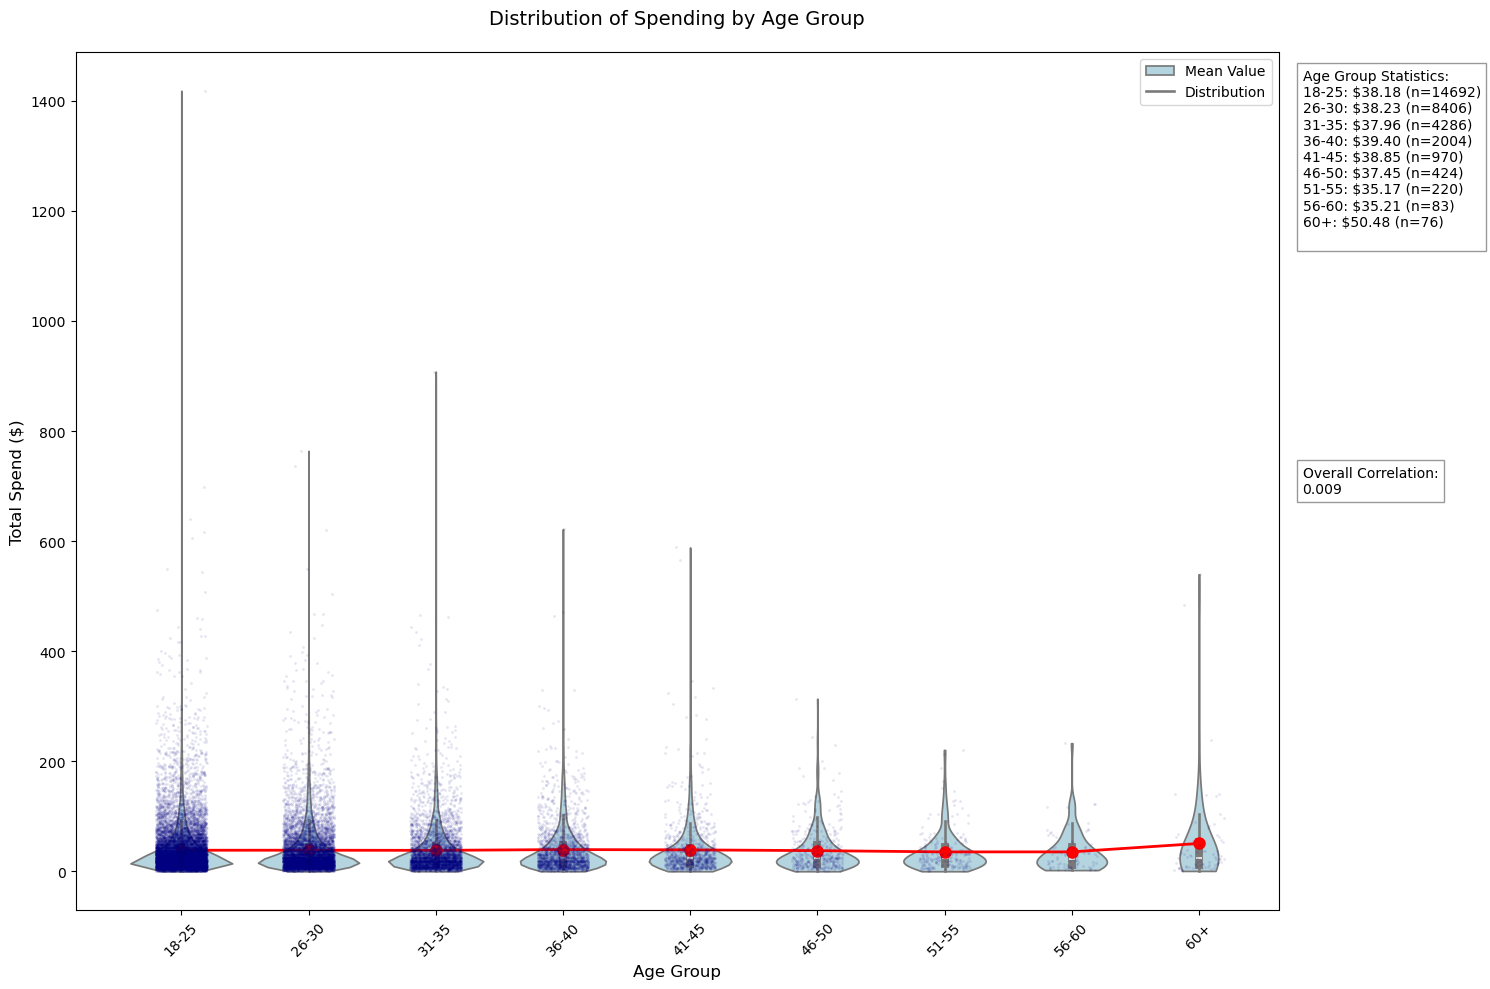


Detailed Age Group Statistics:
          total_spend       
                 mean  count
age_group                   
18-25           38.18  14692
26-30           38.23   8406
31-35           37.96   4286
36-40           39.40   2004
41-45           38.85    970
46-50           37.45    424
51-55           35.17    220
56-60           35.21     83
60+             50.48     76


In [192]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate total spend
cuisine_cols = [col for col in df.columns if col.startswith('CUI_')]
df['total_spend'] = df[cuisine_cols].sum(axis=1)

# Create figure
plt.figure(figsize=(15, 10))

# Create age groups
df['age_group'] = pd.cut(df['customer_age'], 
                        bins=[0, 25, 30, 35, 40, 45, 50, 55, 60, 100],
                        labels=['18-25', '26-30', '31-35', '36-40', '41-45', 
                               '46-50', '51-55', '56-60', '60+'])

# Create violin plot with boxplot inside
sns.violinplot(data=df,
               x='age_group',
               y='total_spend',
               inner='box',
               color='lightblue',
               cut=0)

# Add individual points with jitter and transparency
sns.stripplot(data=df,
              x='age_group',
              y='total_spend',
              color='navy',
              alpha=0.1,
              size=2,
              jitter=0.2)

# Calculate and plot mean values
mean_values = df.groupby('age_group')['total_spend'].mean()
plt.plot(range(len(mean_values)), mean_values.values, 'ro-', 
         label='Mean Value', linewidth=2, markersize=8)

# Calculate statistics
age_stats = df.groupby('age_group').agg({
    'total_spend': ['mean', 'count'],
}).round(2)

# Create statistics text
stats_text = "Age Group Statistics:\n"
for idx in age_stats.index:
    mean_val = age_stats.loc[idx, ('total_spend', 'mean')]
    count = age_stats.loc[idx, ('total_spend', 'count')]
    stats_text += f"{idx}: ${mean_val:.2f} (n={count})\n"

# Add statistics text box
plt.text(1.02, 0.98, stats_text,
         transform=plt.gca().transAxes,
         verticalalignment='top',
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Calculate overall correlation
correlation = df['customer_age'].corr(df['total_spend'])
plt.text(1.02, 0.5, f"Overall Correlation:\n{correlation:.3f}",
         transform=plt.gca().transAxes,
         verticalalignment='center',
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# Customize the plot
plt.title('Distribution of Spending by Age Group', fontsize=14, pad=20)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Spend ($)', fontsize=12)
plt.xticks(rotation=45)

# Add legend
plt.legend(['Mean Value', 'Distribution'])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Print additional insights
print("\nDetailed Age Group Statistics:")
print(age_stats.to_string())

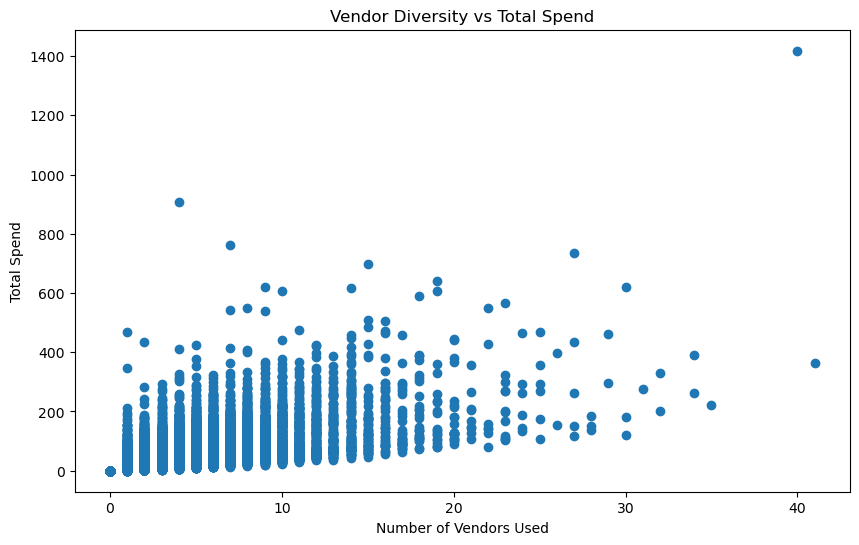

Correlation between vendor count and total spend: 0.6508818224337218


In [193]:
plt.figure(figsize=(10, 6))
plt.scatter(df['vendor_count'], df['total_spend'])
plt.title('Vendor Diversity vs Total Spend')
plt.xlabel('Number of Vendors Used')
plt.ylabel('Total Spend')
plt.show()

print("Correlation between vendor count and total spend:", 
      df['vendor_count'].corr(df['total_spend']))

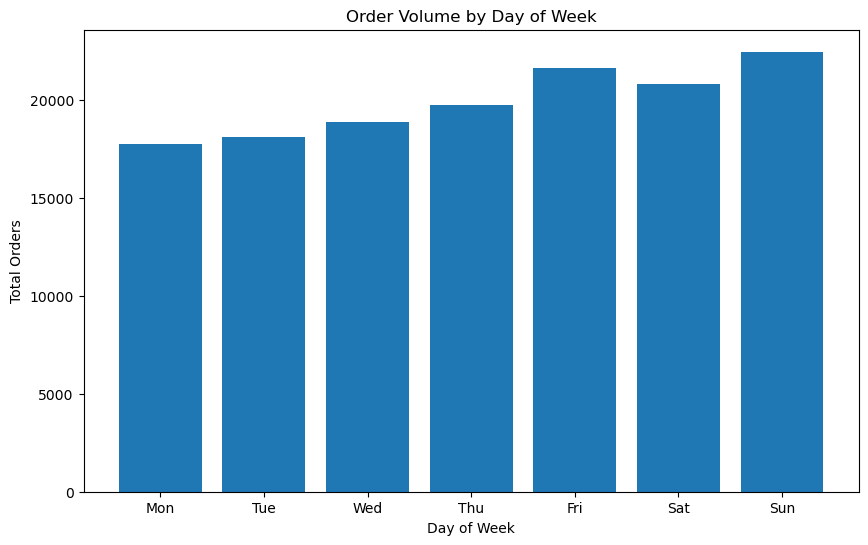

In [194]:
day_cols = [col for col in df.columns if col.startswith('DOW_')]
day_orders = df[day_cols].sum()
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(10, 6))
plt.bar(days, day_orders)
plt.title('Order Volume by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Orders')
plt.show()

/var/folders/dq/lm4hsw5542x634hwm_gj_4bm0000gn/T/ipykernel_92206/592959414.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cuisine_by_age = df.groupby('age_group')[cuisine_cols].mean()


<Figure size 1200x600 with 0 Axes>

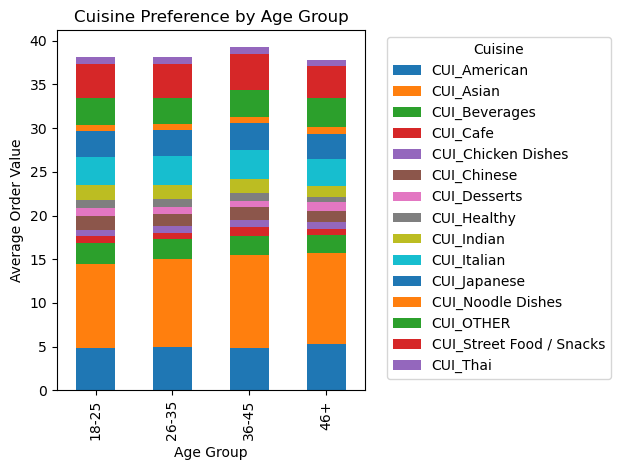

In [195]:
df['age_group'] = pd.cut(df['customer_age'], bins=[0, 25, 35, 45, 100], labels=['18-25', '26-35', '36-45', '46+'])
cuisine_by_age = df.groupby('age_group')[cuisine_cols].mean()

plt.figure(figsize=(12, 6))
cuisine_by_age.plot(kind='bar', stacked=True)
plt.title('Cuisine Preference by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Order Value')
plt.legend(title='Cuisine', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/var/folders/dq/lm4hsw5542x634hwm_gj_4bm0000gn/T/ipykernel_92206/942376764.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  payment_by_spend = df.groupby('spend_category')['payment_method'].value_counts(normalize=True).unstack()


<Figure size 1200x600 with 0 Axes>

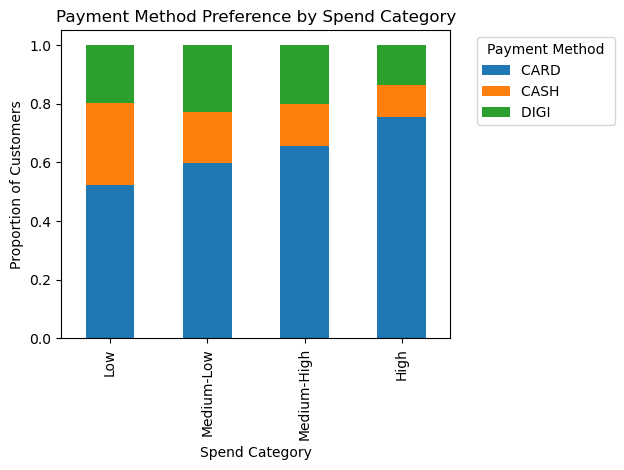

In [196]:
df['spend_category'] = pd.qcut(df['total_spend'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])
payment_by_spend = df.groupby('spend_category')['payment_method'].value_counts(normalize=True).unstack()

plt.figure(figsize=(12, 6))
payment_by_spend.plot(kind='bar', stacked=True)
plt.title('Payment Method Preference by Spend Category')
plt.xlabel('Spend Category')
plt.ylabel('Proportion of Customers')
plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

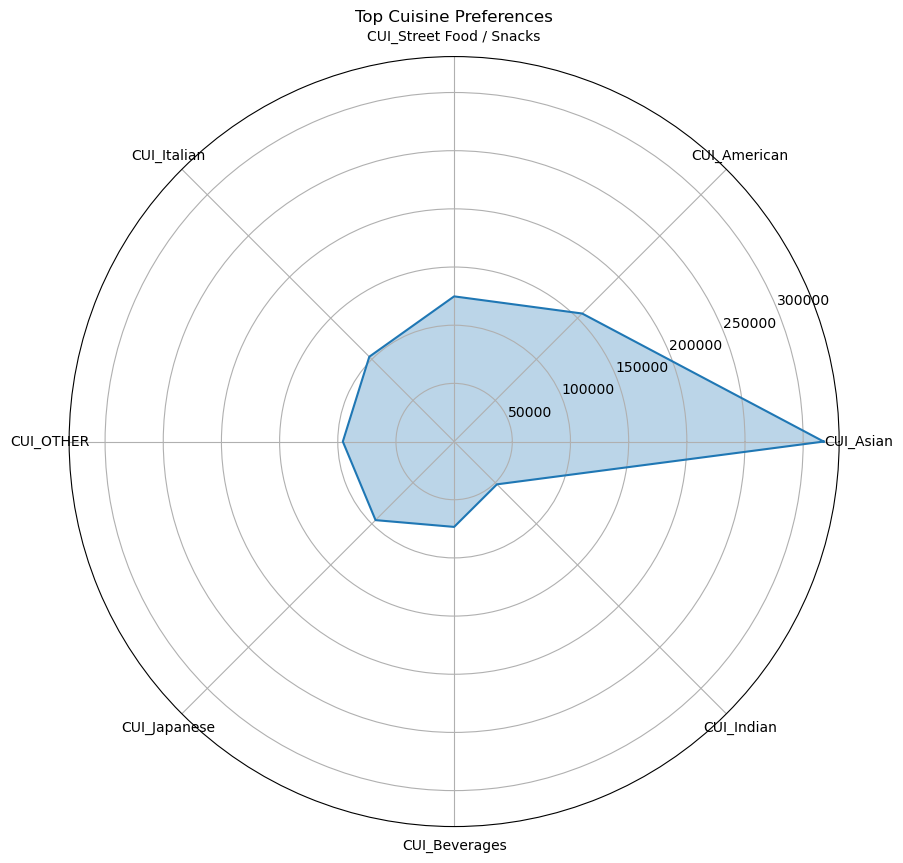

In [197]:

from math import pi

# Prepare data
cuisine_totals = df[cuisine_cols].sum().sort_values(ascending=False)
top_cuisines = cuisine_totals.nlargest(8)

# Calculate angles for each cuisine
angles = [n / float(len(top_cuisines)) * 2 * pi for n in range(len(top_cuisines))]
angles += angles[:1]

# Create plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
ax.plot(angles, list(top_cuisines.values) + [top_cuisines.values[0]])
ax.fill(angles, list(top_cuisines.values) + [top_cuisines.values[0]], alpha=0.3)

# Set labels
plt.xticks(angles[:-1], top_cuisines.index)
plt.title('Top Cuisine Preferences')
plt.show()

In [198]:
def calculate_avg_order_value(df):
    # Get all cuisine columns (they start with 'CUI_')
    cuisine_columns = [col for col in df.columns if col.startswith('CUI_')]
    
    # Sum up all cuisine values to get total spending
    total_spending = df[cuisine_columns].sum(axis=1)
    
    # Get total number of orders (first_order to last_order inclusive)
    # Since first_order and last_order appear to be binary (0/1), we'll use the vendor_count
    # as a proxy for number of orders
    orders = df['vendor_count']
    
    # Calculate average order value
    df['avg_order_value'] = total_spending / orders
    
    return df

# Assuming your dataframe is called 'df'
df = calculate_avg_order_value(df)  

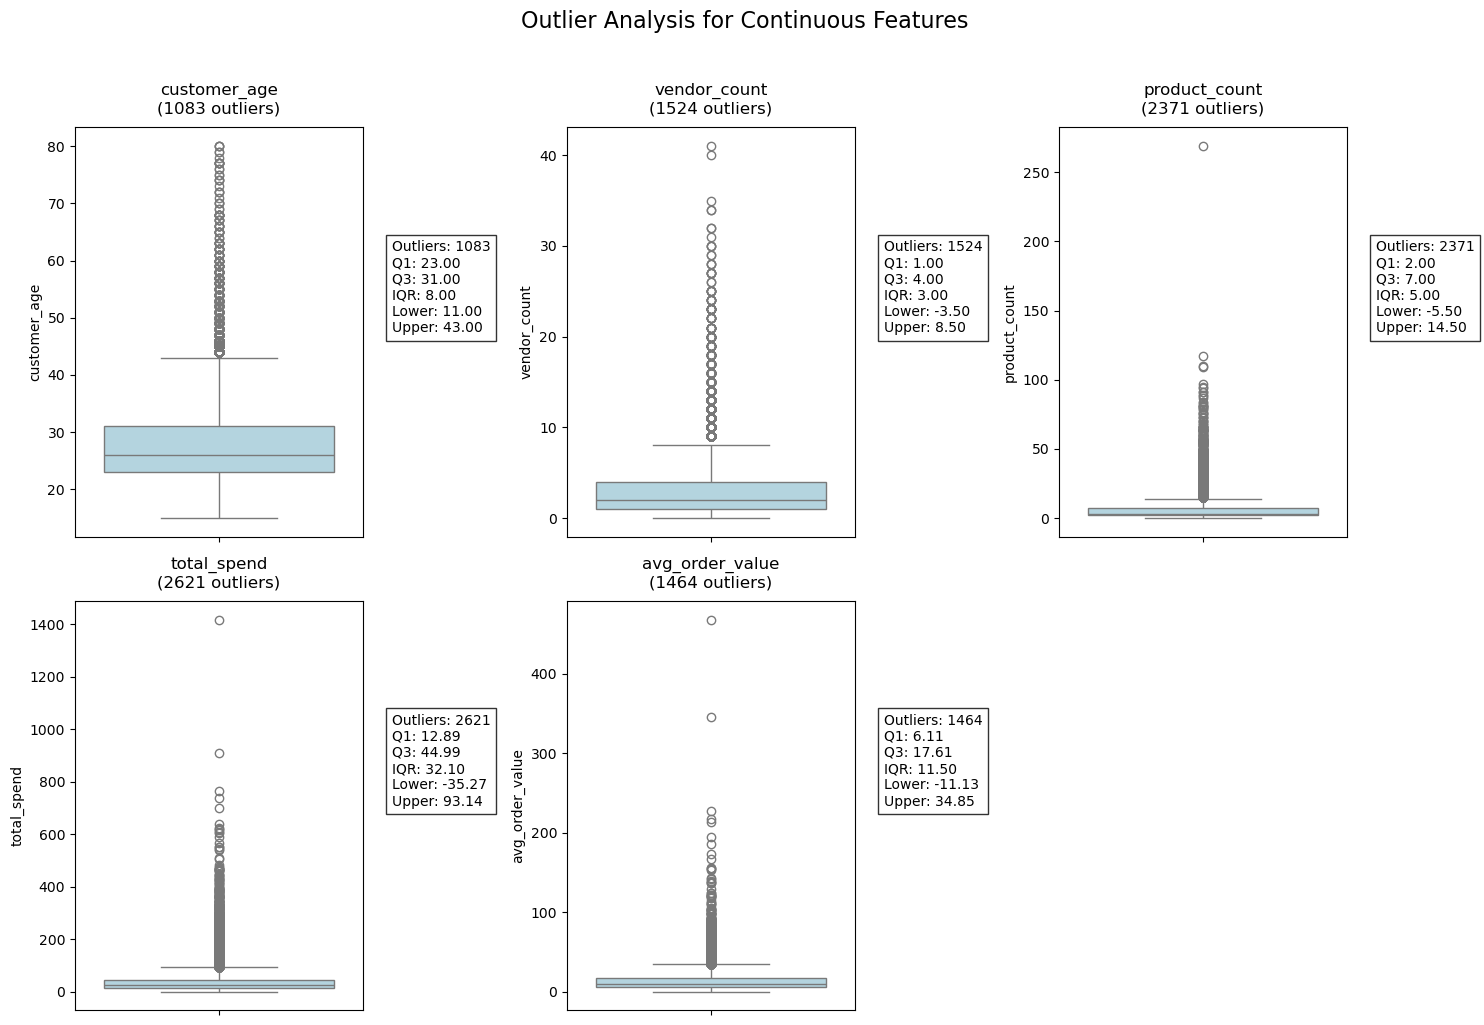

In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_outliers(df):
    # Select only continuous numerical columns
    continuous_cols = ['customer_age', 'vendor_count', 'product_count', 
                      'total_spend', 'avg_order_value']
    
    # Filter for columns that exist in the dataframe
    continuous_cols = [col for col in continuous_cols if col in df.columns]
    
    # Initialize outlier report dictionary
    outlier_report = {}
    
    # Create subplots for each continuous column
    n_cols = len(continuous_cols)
    n_rows = (n_cols + 2) // 3  # 3 plots per row
    
    fig = plt.figure(figsize=(15, 5*n_rows))
    fig.suptitle('Outlier Analysis for Continuous Features', fontsize=16, y=1.02)
    
    for idx, col in enumerate(continuous_cols, 1):
        # Create subplot
        plt.subplot(n_rows, 3, idx)
        
        # Create simple box plot
        sns.boxplot(y=df[col], color='lightblue')
        
        # Calculate outlier bounds
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = df[col][(df[col] < lower_bound) | (df[col] > upper_bound)]
        
        # Store outlier information in report
        outlier_report[col] = {
            'total_outliers': len(outliers),
            'outlier_percentage': (len(outliers) / len(df)) * 100,
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'min_value': df[col].min(),
            'max_value': df[col].max(),
            'outlier_indices': outliers.index.tolist(),
            'low_outliers': df[col][df[col] < lower_bound].count(),
            'high_outliers': df[col][df[col] > upper_bound].count()
        }
        
        plt.title(f'{col}\n({len(outliers)} outliers)', pad=10)
        
        # Add text with statistics
        stats_text = (f'Outliers: {len(outliers)}\n'
                     f'Q1: {Q1:.2f}\n'
                     f'Q3: {Q3:.2f}\n'
                     f'IQR: {IQR:.2f}\n'
                     f'Lower: {lower_bound:.2f}\n'
                     f'Upper: {upper_bound:.2f}')
        
        plt.text(1.1, 0.5, stats_text, transform=plt.gca().transAxes, 
                bbox=dict(facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    # Create a summary DataFrame from the outlier report
    summary_data = []
    for col, stats in outlier_report.items():
        summary_data.append({
            'Column': col,
            'Total Outliers': stats['total_outliers'],
            'Outlier %': f"{stats['outlier_percentage']:.2f}%",
            'Low Outliers': stats['low_outliers'],
            'High Outliers': stats['high_outliers'],
            'Lower Bound': f"{stats['lower_bound']:.2f}",
            'Upper Bound': f"{stats['upper_bound']:.2f}"
        })
    
    summary_df = pd.DataFrame(summary_data)
    
    return {
        'detailed_report': outlier_report,
        'summary': summary_df
    }

outlier_results = analyze_outliers(df)
# print(outlier_results['summary'])
# 
# # To get detailed information for a specific column:
#print(outlier_results['detailed_report']['customer_age'])

In [200]:
# Calculate Cramér's V for each pair of variables
for i in range(n_vars):
    for j in range(i, n_vars):
        var1 = categorical_vars[i]
        var2 = categorical_vars[j]
        
        # Create contingency table
        confusion_matrix = pd.crosstab(df[var1], df[var2])
        
        # Calculate Chi-square statistic and Cramér's V
        chi2_stat = chi2_contingency(confusion_matrix)[0]  # Get only the statistic
        n = confusion_matrix.sum().sum()  # Get total observations
        min_dim = min(confusion_matrix.shape) - 1
        cramers_v = np.sqrt(chi2_stat / (n * min_dim))
        
        # Fill the symmetric matrix
        cramers_v_matrix[i, j] = cramers_v
        cramers_v_matrix[j, i] = cramers_v

# Create DataFrame with results
cramers_df = pd.DataFrame(
    cramers_v_matrix,
    index=categorical_vars,
    columns=categorical_vars
)

# Round to 3 decimal places
cramers_df = cramers_df.round(3)

print("Cramér's V Results:")
print(cramers_df)

Cramér's V Results:
                 customer_id  customer_region  last_promo  payment_method
customer_id              1.0            1.000       1.000           1.000
customer_region          1.0            1.000       0.058           0.049
last_promo               1.0            0.058       1.000           0.091
payment_method           1.0            0.049       0.091           1.000


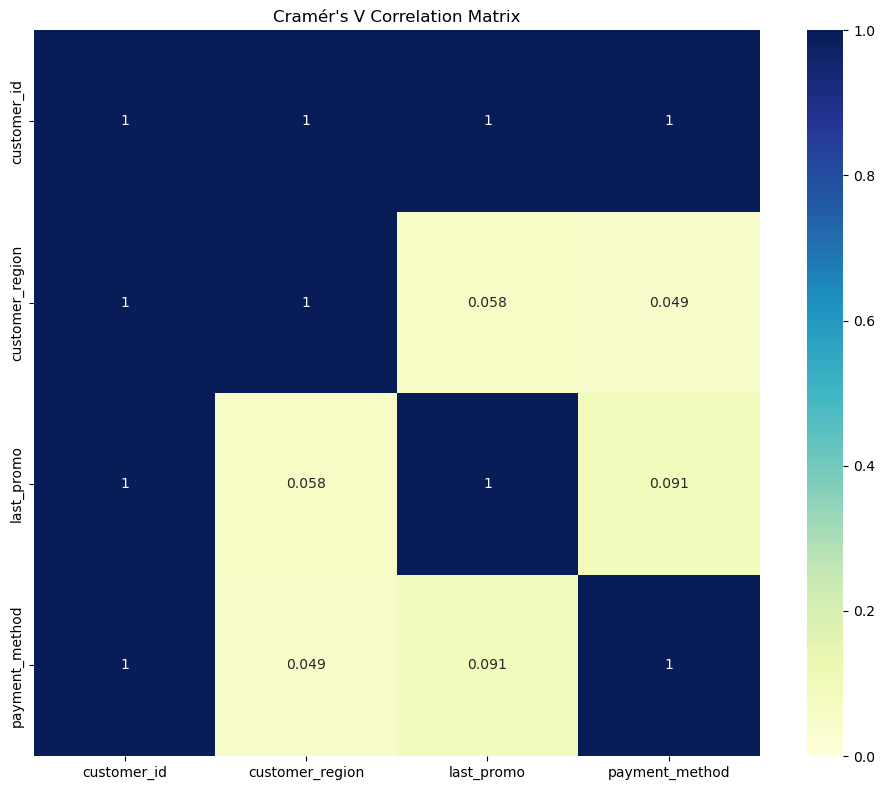


Analysis of Cramér's V Results:
1. Perfect correlations (1.0):
   - customer_id with all variables (expected as it's a unique identifier)

2. Meaningful associations:
   - last_promo & payment_method: Weak association (0.091)
   - customer_region & last_promo: Weak association (0.058)
   - customer_region & payment_method: Very weak association (0.049)

Note: Values interpretation:
- 0.0 to 0.1: Negligible association
- 0.1 to 0.3: Weak association
- 0.3 to 0.5: Moderate association
- >0.5: Strong association


In [201]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of Cramér's V values
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_df, 
            annot=True,  # Show values
            cmap='YlGnBu',  # Color scheme
            vmin=0, 
            vmax=1,
            square=True)  # Make cells square
plt.title("Cramér's V Correlation Matrix")
plt.tight_layout()
plt.show()

# Analysis of results:
print("\nAnalysis of Cramér's V Results:")
print("1. Perfect correlations (1.0):")
print("   - customer_id with all variables (expected as it's a unique identifier)")
print("\n2. Meaningful associations:")
print("   - last_promo & payment_method: Weak association (0.091)")
print("   - customer_region & last_promo: Weak association (0.058)")
print("   - customer_region & payment_method: Very weak association (0.049)")

print("\nNote: Values interpretation:")
print("- 0.0 to 0.1: Negligible association")
print("- 0.1 to 0.3: Weak association")
print("- 0.3 to 0.5: Moderate association")
print("- >0.5: Strong association")

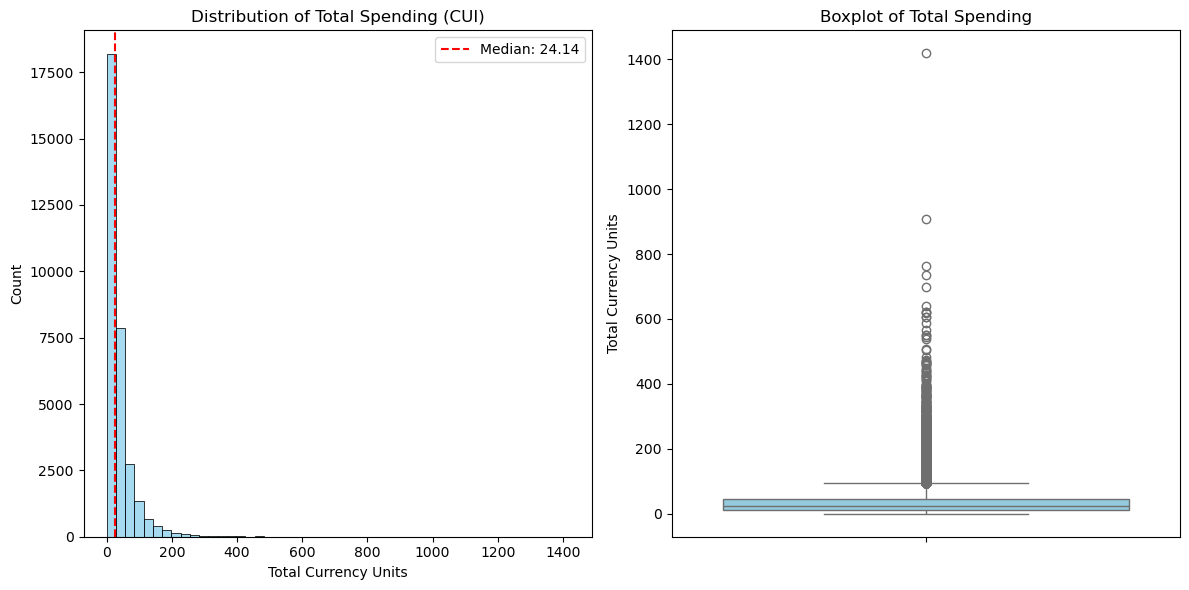


Summary Statistics for Total CUI:
Median: 24.14
Mean: 38.30
Standard Deviation: 46.41
Minimum: 0.00
Maximum: 1418.33
25th Percentile: 12.89
75th Percentile: 44.99


In [202]:
# Calculate Total_CUI by summing all cuisine-specific columns
cui_columns = [col for col in df.columns if col.startswith('CUI_')]
df['Total_CUI'] = df[cui_columns].sum(axis=1)

# Create visualization
plt.figure(figsize=(12, 6))

# Create subplot for the distribution
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Total_CUI', bins=50, color='skyblue')
plt.title('Distribution of Total Spending (CUI)')
plt.xlabel('Total Currency Units')
plt.ylabel('Count')
plt.axvline(df['Total_CUI'].median(), color='red', linestyle='--', label=f'Median: {df["Total_CUI"].median():.2f}')
plt.legend()

# Create subplot for boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Total_CUI'], color='skyblue')
plt.title('Boxplot of Total Spending')
plt.ylabel('Total Currency Units')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics for Total CUI:")
print(f"Median: {df['Total_CUI'].median():.2f}")
print(f"Mean: {df['Total_CUI'].mean():.2f}")
print(f"Standard Deviation: {df['Total_CUI'].std():.2f}")
print(f"Minimum: {df['Total_CUI'].min():.2f}")
print(f"Maximum: {df['Total_CUI'].max():.2f}")
print(f"25th Percentile: {df['Total_CUI'].quantile(0.25):.2f}")
print(f"75th Percentile: {df['Total_CUI'].quantile(0.75):.2f}")

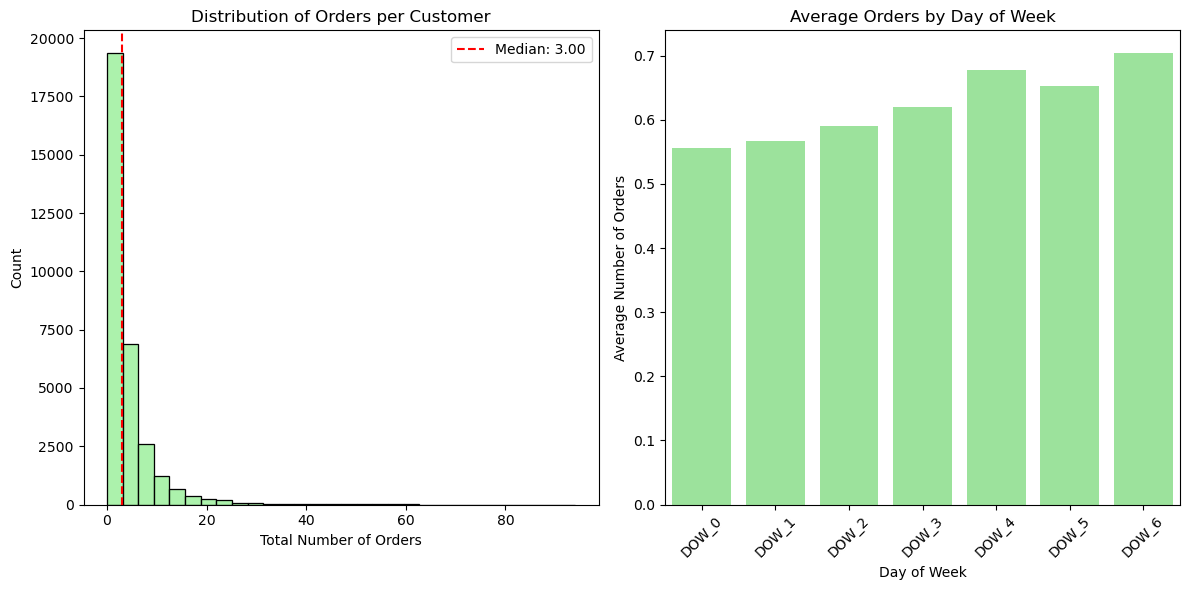


Summary Statistics for Total DOW Orders:
Median: 3.00 orders per quarter
Mean: 4.37
Standard Deviation: 5.08
Minimum: 0.00
Maximum: 94.00

Orders per month (median): 1.00

Average Orders by Day:
DOW_0: 0.556
DOW_1: 0.567
DOW_2: 0.591
DOW_3: 0.619
DOW_4: 0.678
DOW_5: 0.653
DOW_6: 0.704


In [203]:
# Calculate Total_DOW_Orders by summing all day-of-week columns
dow_columns = [col for col in df.columns if col.startswith('DOW_')]
df['Total_DOW_Orders'] = df[dow_columns].sum(axis=1)

# Create visualization
plt.figure(figsize=(12, 6))

# Create subplot for the distribution
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Total_DOW_Orders', bins=30, color='lightgreen')
plt.title('Distribution of Orders per Customer')
plt.xlabel('Total Number of Orders')
plt.ylabel('Count')
plt.axvline(df['Total_DOW_Orders'].median(), color='red', linestyle='--', 
           label=f'Median: {df["Total_DOW_Orders"].median():.2f}')
plt.legend()

# Create subplot for day of week distribution
plt.subplot(1, 2, 2)
dow_means = df[dow_columns].mean()
sns.barplot(x=dow_means.index, y=dow_means.values, color='lightgreen')
plt.title('Average Orders by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Number of Orders')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics for Total DOW Orders:")
print(f"Median: {df['Total_DOW_Orders'].median():.2f} orders per quarter")
print(f"Mean: {df['Total_DOW_Orders'].mean():.2f}")
print(f"Standard Deviation: {df['Total_DOW_Orders'].std():.2f}")
print(f"Minimum: {df['Total_DOW_Orders'].min():.2f}")
print(f"Maximum: {df['Total_DOW_Orders'].max():.2f}")
print(f"\nOrders per month (median): {df['Total_DOW_Orders'].median()/3:.2f}")

# Day of week distribution
print("\nAverage Orders by Day:")
for day, value in dow_means.items():
   print(f"{day}: {value:.3f}")


Spending Statistics by Payment Method:
                 Count   Mean  Median  Std Dev  Min      Max
payment_method                                              
CARD             20161  42.67   27.37    49.06  0.0  1418.33
CASH              5626  28.52   17.80    39.92  0.0   639.76
DIGI              6101  32.91   21.14    40.69  0.0   617.40

Percentage Distribution of Payment Methods:
CARD           : 63.2%
DIGI           : 19.1%
CASH           : 17.6%


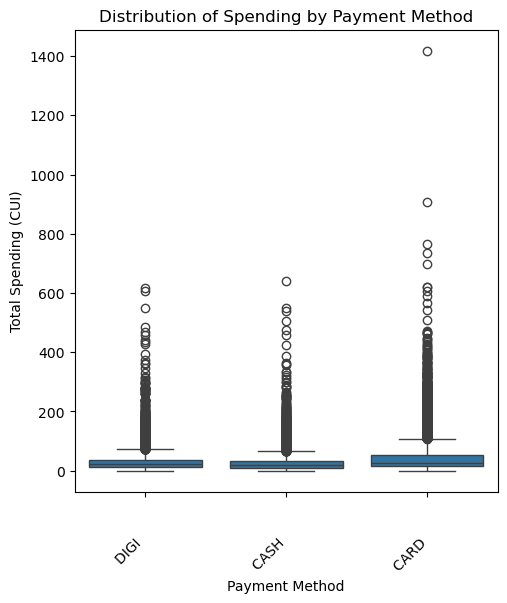

In [204]:
# Calculate Total_CUI by summing all cuisine-specific columns
cui_columns = [col for col in df.columns if col.startswith('CUI_')]
df['Total_CUI'] = df[cui_columns].sum(axis=1)

# Create visualization
plt.figure(figsize=(12, 6))

# Create subplot for boxplot
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='payment_method', y='Total_CUI')
plt.title('Distribution of Spending by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Spending (CUI)')
plt.xticks(rotation=45)



# Print summary statistics by payment method
print("\nSpending Statistics by Payment Method:")
stats = df.groupby('payment_method')['Total_CUI'].agg([
   ('Count', 'count'),
   ('Mean', 'mean'),
   ('Median', 'median'),
   ('Std Dev', 'std'),
   ('Min', 'min'),
   ('Max', 'max')
]).round(2)

print(stats)

# Calculate percentage of orders by payment method
payment_dist = df['payment_method'].value_counts(normalize=True).round(3) * 100
print("\nPercentage Distribution of Payment Methods:")
for method, percentage in payment_dist.items():
   print(f"{method}: {percentage:.1f}%")

<Figure size 1200x600 with 0 Axes>

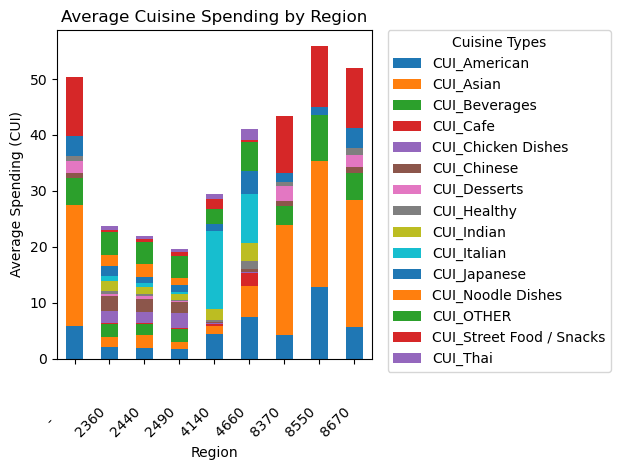


Top Cuisines by Region:

Region -               :
Asian: 21.62 CUI
Street Food / Snacks: 10.42 CUI
American: 5.87 CUI

Region 2360            :
OTHER: 4.03 CUI
Chinese: 2.66 CUI
Beverages: 2.22 CUI

Region 2440            :
OTHER: 4.05 CUI
Chinese: 2.40 CUI
Noodle Dishes: 2.20 CUI

Region 2490            :
OTHER: 3.94 CUI
Chicken Dishes: 2.77 CUI
Beverages: 2.29 CUI

Region 4140            :
Italian: 13.85 CUI
American: 4.35 CUI
OTHER: 2.69 CUI

Region 4660            :
Italian: 8.73 CUI
American: 7.39 CUI
Asian: 5.58 CUI

Region 8370            :
Asian: 19.78 CUI
Street Food / Snacks: 10.10 CUI
American: 4.15 CUI

Region 8550            :
Asian: 22.58 CUI
American: 12.81 CUI
Street Food / Snacks: 10.93 CUI

Region 8670            :
Asian: 22.81 CUI
Street Food / Snacks: 10.73 CUI
American: 5.61 CUI


In [205]:
# Calculate cuisine preferences by region
cui_columns = [col for col in df.columns if col.startswith('CUI_')]

# Calculate mean cuisine spending by region
cuisine_by_region = df.groupby('customer_region')[cui_columns].mean()

# Create visualization
plt.figure(figsize=(12, 6))
cuisine_by_region.plot(kind='bar', stacked=True)
plt.title('Average Cuisine Spending by Region')
plt.xlabel('Region')
plt.ylabel('Average Spending (CUI)')
plt.legend(title='Cuisine Types', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print summary of top cuisines per region
print("\nTop Cuisines by Region:")
for region in cuisine_by_region.index:
   top_cuisines = cuisine_by_region.loc[region].sort_values(ascending=False).head(3)
   print(f"\nRegion {region}:")
   for cuisine, amount in top_cuisines.items():
       cuisine_name = cuisine.replace('CUI_', '')
       print(f"{cuisine_name}: {amount:.2f} CUI")

In [206]:
# Calculate total spending on each cuisine type by region
cui_columns = [col for col in df.columns if col.startswith('CUI_')]

# Get mean spending for each cuisine by region
cuisine_by_region = df.groupby('customer_region')[cui_columns].mean()

# Find the dominant cuisine for each region (where the region has the highest average compared to other regions)
dominant_cuisines = {}

for cuisine in cui_columns:
   # Get region with highest average spending for this cuisine
   max_region = cuisine_by_region[cuisine].idxmax()
   max_value = cuisine_by_region[cuisine].max()
   # Only include if the spending is meaningful (you might want to adjust this threshold)
   if max_value > 0:
       dominant_cuisines[cuisine.replace('CUI_', '')] = {
           'region': max_region,
           'value': max_value,
           'compared_to_avg': max_value / cuisine_by_region[cuisine].mean()
       }

# Sort by relative difference to average
dominant_cuisines = dict(sorted(dominant_cuisines.items(), 
                             key=lambda x: x[1]['compared_to_avg'], 
                             reverse=True))

# Print analysis
print("Regional Cuisine Specialties (compared to other regions):\n")
for cuisine, data in dominant_cuisines.items():
   print(f"Region {data['region']} leads in {cuisine}")
   print(f"- Average spending: {data['value']:.2f} CUI")
   print(f"- {data['compared_to_avg']:.1f}x higher than other regions\n")

Regional Cuisine Specialties (compared to other regions):

Region 4660             leads in Cafe
- Average spending: 2.34 CUI
- 6.1x higher than other regions

Region 4140             leads in Italian
- Average spending: 13.85 CUI
- 5.1x higher than other regions

Region 4660             leads in Thai
- Average spending: 1.91 CUI
- 3.7x higher than other regions

Region 2490             leads in Chicken Dishes
- Average spending: 2.77 CUI
- 3.5x higher than other regions

Region 2440             leads in Noodle Dishes
- Average spending: 2.20 CUI
- 3.5x higher than other regions

Region 4660             leads in Indian
- Average spending: 3.21 CUI
- 3.1x higher than other regions

Region 8370             leads in Desserts
- Average spending: 2.56 CUI
- 2.8x higher than other regions

Region 8550             leads in Beverages
- Average spending: 8.21 CUI
- 2.7x higher than other regions

Region 8550             leads in American
- Average spending: 12.81 CUI
- 2.5x higher than other re

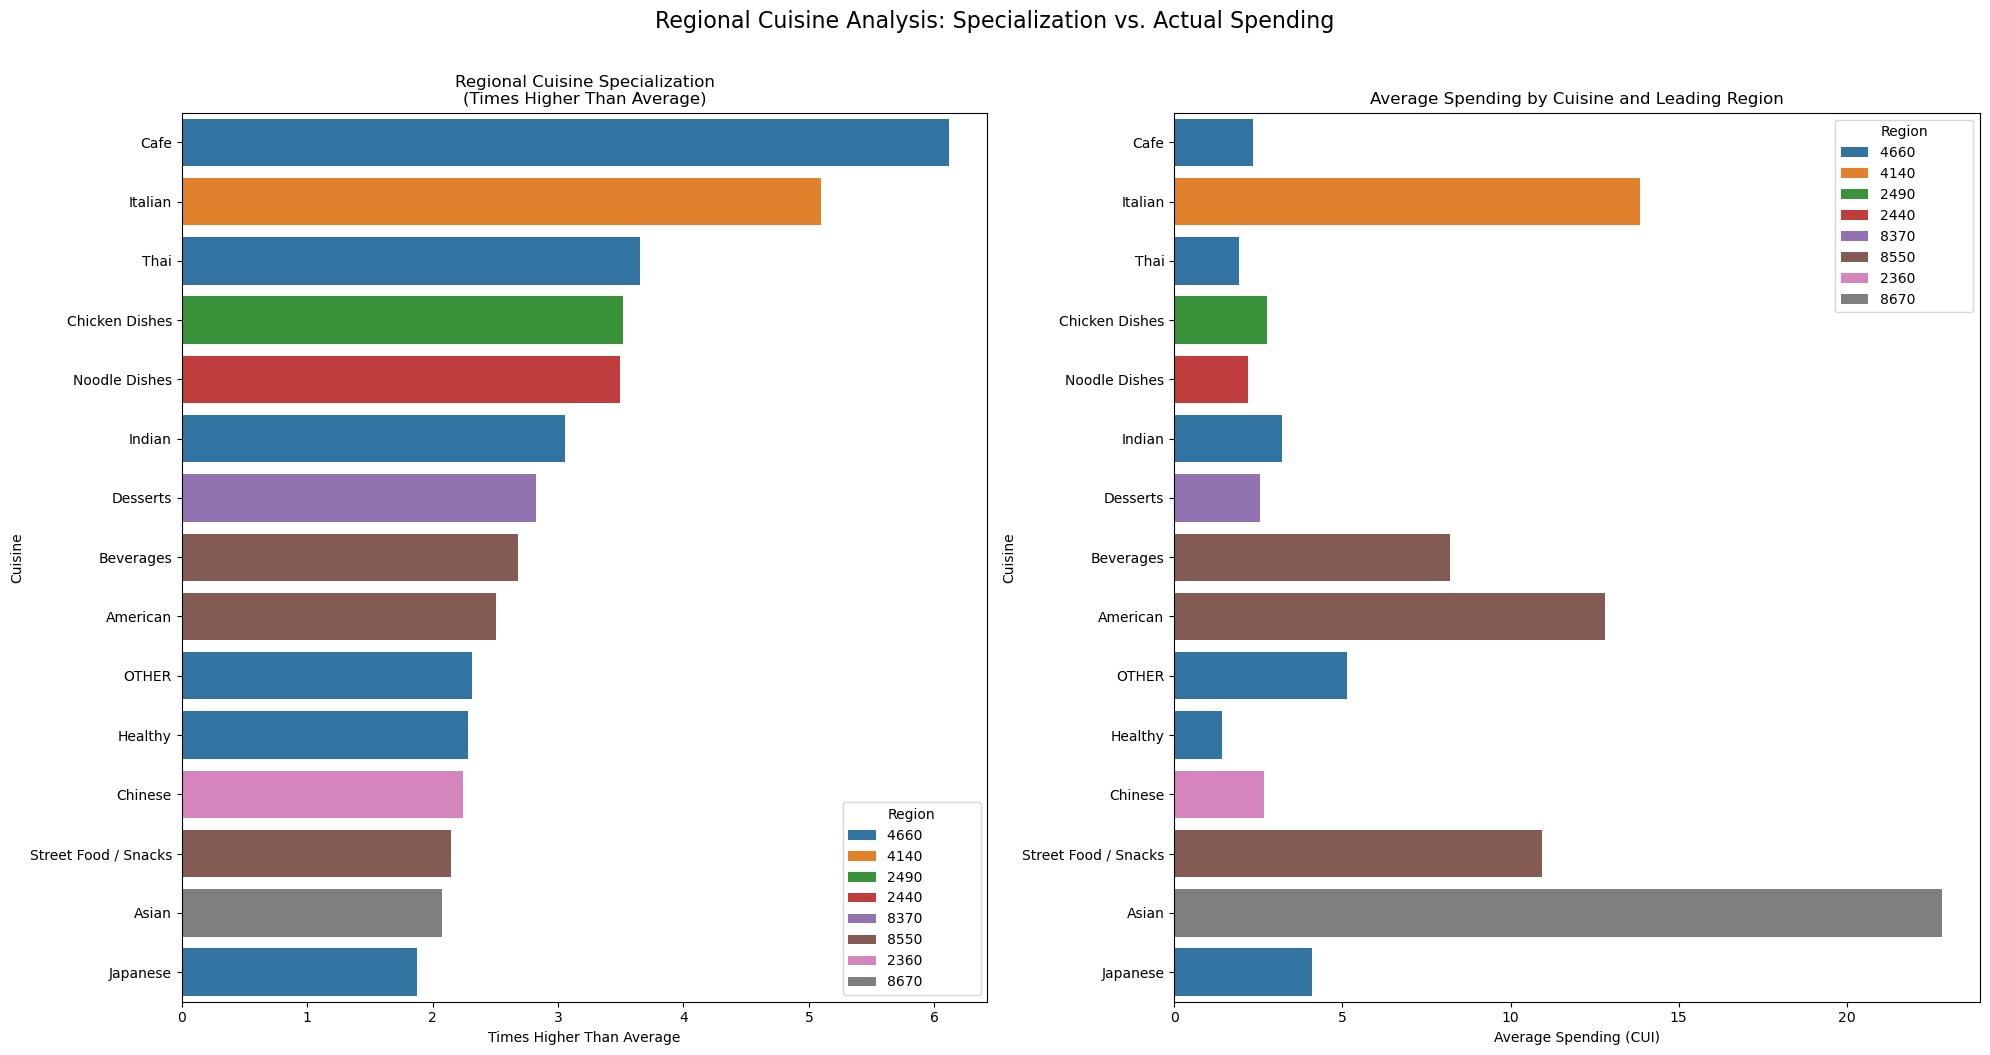


Key Regional Specialties:

Region 4660             (6 specialties):
Dominant in: Cafe, Thai, Indian, OTHER, Healthy, Japanese

Region 8550             (3 specialties):
Dominant in: Beverages, American, Street Food / Snacks

Region 4140             (1 specialties):
Dominant in: Italian

Region 2490             (1 specialties):
Dominant in: Chicken Dishes

Region 2440             (1 specialties):
Dominant in: Noodle Dishes

Region 8370             (1 specialties):
Dominant in: Desserts

Region 2360             (1 specialties):
Dominant in: Chinese

Region 8670             (1 specialties):
Dominant in: Asian


In [207]:
# Create a more organized visualization of regional cuisine specialties

# Prepare data for plotting
regions = []
cuisines = []
multipliers = []
spending = []

for cuisine, data in dominant_cuisines.items():
   regions.append(data['region'])
   cuisines.append(cuisine)
   multipliers.append(data['compared_to_avg'])
   spending.append(data['value'])

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Plot 1: Specialization Level (how many times higher than average)
specialization_data = pd.DataFrame({
   'Region': regions,
   'Cuisine': cuisines,
   'Times Higher': multipliers
})

# Using sns.barplot instead of barh
sns.barplot(x='Times Higher', y='Cuisine', data=specialization_data, ax=ax1,
        hue='Region', dodge=False)
ax1.set_title('Regional Cuisine Specialization\n(Times Higher Than Average)')
ax1.set_xlabel('Times Higher Than Average')

# Plot 2: Actual Spending
spending_data = pd.DataFrame({
   'Region': regions,
   'Cuisine': cuisines,
   'Spending': spending
})

sns.barplot(x='Spending', y='Cuisine', data=spending_data, ax=ax2,
        hue='Region', dodge=False)
ax2.set_title('Average Spending by Cuisine and Leading Region')
ax2.set_xlabel('Average Spending (CUI)')

# Adjust layout
plt.tight_layout()

# Add a main title
fig.suptitle('Regional Cuisine Analysis: Specialization vs. Actual Spending', 
            fontsize=16, y=1.05)

plt.show()

# Print summary of key findings
print("\nKey Regional Specialties:")
region_counts = pd.Series(regions).value_counts()
for region, count in region_counts.items():
   cuisines_list = [c for r, c in zip(regions, cuisines) if r == region]
   print(f"\nRegion {region} ({count} specialties):")
   print(f"Dominant in: {', '.join(cuisines_list)}")

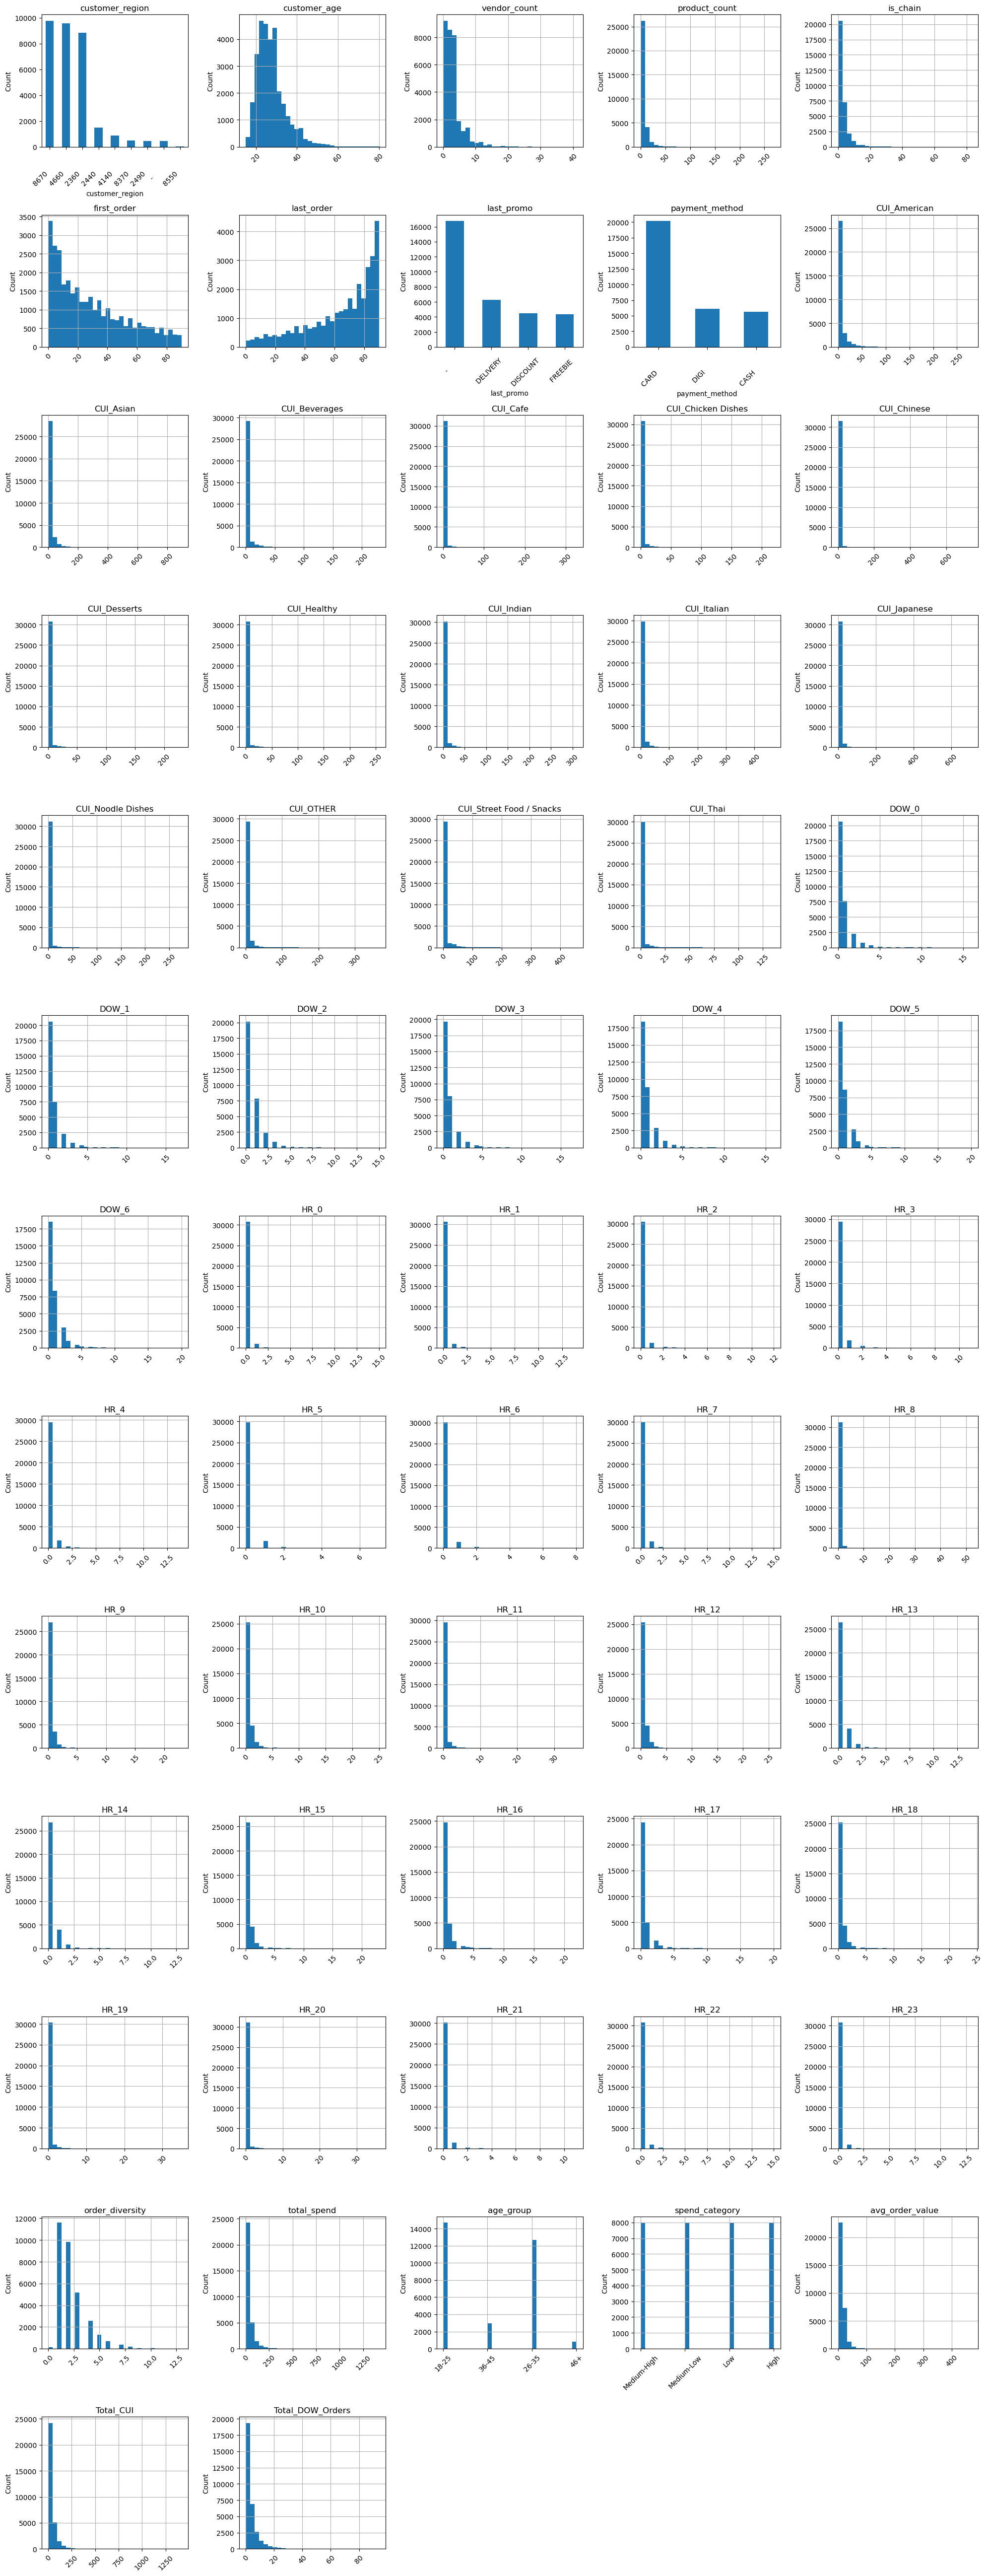


Column Statistics:
         customer_id   customer_region  customer_age  vendor_count  \
count          31888             31888       31161.0      31888.00   
unique         31875                 9          <NA>           NaN   
top     742ca068fc    8670                      <NA>           NaN   
freq               2              9761          <NA>           NaN   
mean             NaN               NaN         27.51          3.10   
std              NaN               NaN          7.16          2.77   
min              NaN               NaN          15.0          0.00   
25%              NaN               NaN          23.0          1.00   
50%              NaN               NaN          26.0          2.00   
75%              NaN               NaN          31.0          4.00   
max              NaN               NaN          80.0         41.00   

        product_count  is_chain  first_order  last_order   last_promo  \
count        31888.00  31888.00      31782.0    31888.00        31

In [210]:
# Create a more organized subplot view of all columns
import numpy as np

# Get all columns except customer_id (unique identifier)
columns = [col for col in df.columns if col != 'customer_id']

# Calculate number of rows and columns for subplots
n_plots = len(columns)
n_cols = 5  # Number of columns in the grid
n_rows = int(np.ceil(n_plots / n_cols))

# Create figure and subplots
plt.figure(figsize=(20, 4*n_rows))

for i, col in enumerate(columns, 1):
   plt.subplot(n_rows, n_cols, i)
   
   # For categorical variables
   if df[col].dtype == 'object':
       df[col].value_counts().plot(kind='bar')
   # For numeric variables
   else:
       df[col].hist(bins=30)
   
   plt.title(col)
   plt.xticks(rotation=45)
   plt.ylabel('Count')

plt.tight_layout()
plt.savefig('distribution_plots.png', dpi=450, bbox_inches='tight')
plt.show()

# Print basic statistics for each column
print("\nColumn Statistics:")
print(df.describe(include='all').round(2))

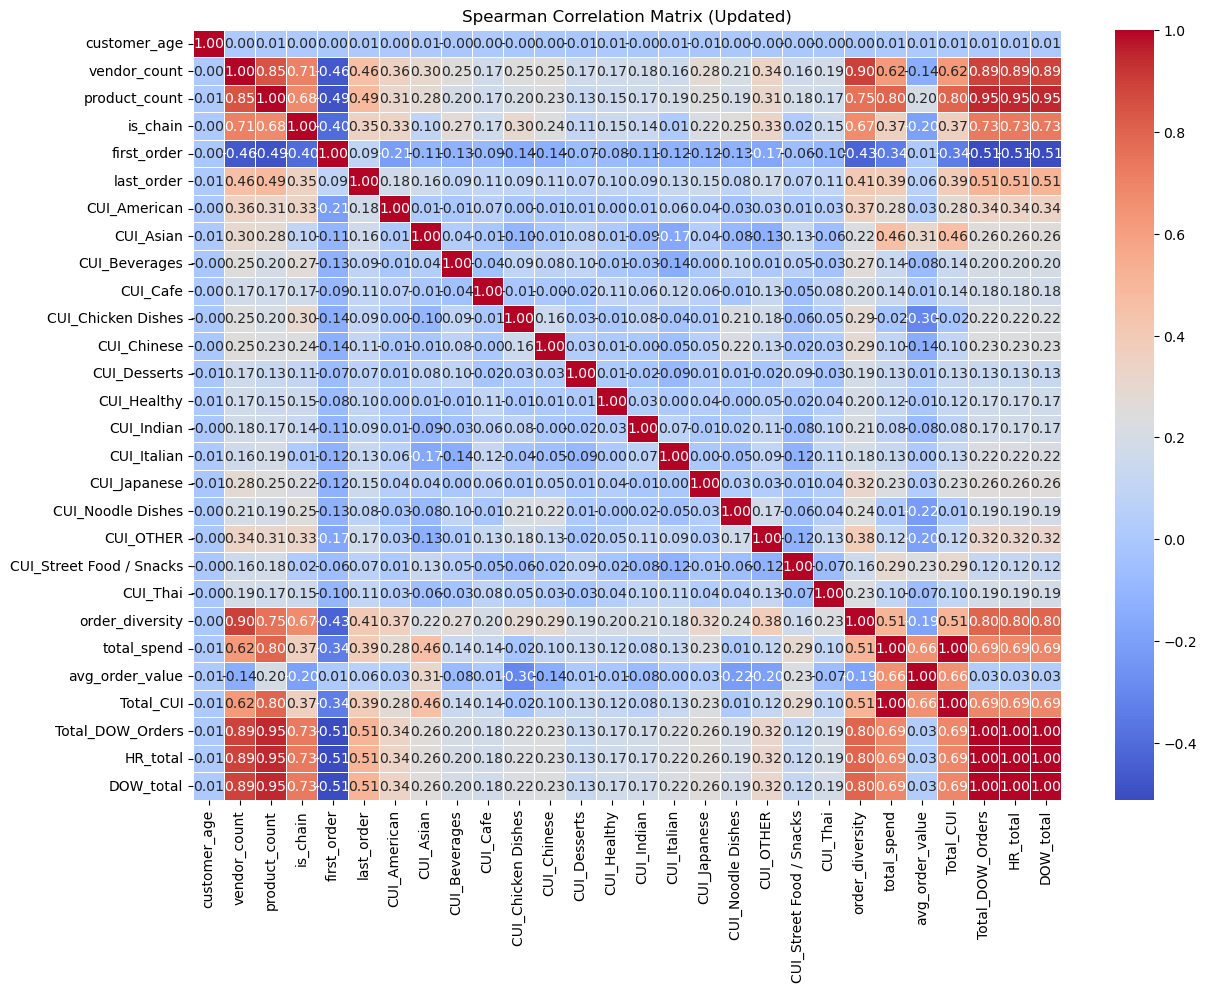

                          customer_age  vendor_count  product_count  is_chain  \
customer_age                  1.000000      0.004341       0.010332  0.003150   
vendor_count                  0.004341      1.000000       0.845161  0.707848   
product_count                 0.010332      0.845161       1.000000  0.679435   
is_chain                      0.003150      0.707848       0.679435  1.000000   
first_order                   0.000091     -0.464799      -0.485459 -0.403855   
last_order                    0.013043      0.458495       0.485475  0.348624   
CUI_American                  0.003999      0.355076       0.313466  0.334014   
CUI_Asian                     0.005667      0.301082       0.283945  0.098269   
CUI_Beverages                -0.004678      0.253354       0.196112  0.269773   
CUI_Cafe                      0.002705      0.174615       0.169794  0.169920   
CUI_Chicken Dishes           -0.002405      0.249503       0.203163  0.302871   
CUI_Chinese                 

In [209]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=[np.number])

# Compute the Spearman correlation matrix
spearman_corr_matrix = numerical_df.corr(method='spearman')

# Sum more appearing columns to one of each type
# For example, summing all 'HR_' columns to 'HR_total'
hr_columns = [col for col in numerical_df.columns if col.startswith('HR_')]
numerical_df['HR_total'] = numerical_df[hr_columns].sum(axis=1)

# Similarly, summing all 'DOW_' columns to 'DOW_total'
dow_columns = [col for col in numerical_df.columns if col.startswith('DOW_')]
numerical_df['DOW_total'] = numerical_df[dow_columns].sum(axis=1)

# Drop the individual 'HR_' and 'DOW_' columns
numerical_df = numerical_df.drop(columns=hr_columns + dow_columns)

# Compute the Spearman correlation matrix again with the updated dataframe
spearman_corr_matrix_updated = numerical_df.corr(method='spearman')
plt.figure(figsize=(14, 10))
sns.heatmap(spearman_corr_matrix_updated, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Spearman Correlation Matrix (Updated)')
plt.show()
# Display the updated Spearman correlation matrix
print(spearman_corr_matrix_updated)